# Regression model using regularisation for Housing Price Prediction

Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. 

**Data Description:** Surprise Housing has collected the Data set from the sale of houses in Australia. The data is provided in the CSV file below. Data Dictionary is provided separately to understand the data.

**Business Goal**:

Model the price of houses with the available independent variables. 
- The model will be used by the management to understand how exactly the prices vary with the variables. Surprise Housing can adapt their strategy based on the model and focus on yield high return areas. 
- The model will also be used by the management to understand the pricing dynamics of a new market(here Australia)

**Analytical Goal**:
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


**1. Understanding the Data and Sanity Check**
- Missing value identification and treatment
- Outliers identification and treatement 
- Identification of Erroneous data

**2: Data Exploration and converting data types**

**3: Data Preparation for the Modeling**
- Dummy varaible creation
- Scaling
- Train and Test data split

**4: Model Building and Evaluation - Linear**
- RFE
- Manual elimination
- Evaluation 

**Inference from Linear Model**

**5: Ridge and Lasso Regression**
- Evaluate the model
- Residual Analysis
- Making predictions
- Model Evaluation

**Inference & Conclusion**

**Reference for the Subjective Questions**


In [1]:
#Importing the needed Liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import matplotlib.pyplot as plt #visualization
import warnings
warnings.filterwarnings("ignore") #Suppress the Future Warnings for a cleaner representation 
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization

from sklearn.model_selection import train_test_split # for train test data split
from sklearn.preprocessing import StandardScaler #standardisation 

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge # Ridge & Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error #Model evaluation

## Step 1. Understanding the Data and Sanity Check

   - Import/Load the Data
   - Data info
   - Columns and thier data types
   - Numeric vs Categorical Columns & conversions
   - Sanity check

In [2]:
#Import/Load the Data
housing = pd.read_csv("train.csv")
#Limiting the floating point variables to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#A quick look into the data
housing.head(3).append(housing.tail(3))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1457,1458,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.00,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
print (housing.info());
print (housing.shape);
old_shape = housing.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Identifying and Treating Missing Values

In [4]:
# See Missing values and Unique values
print ("\nMissing values:", housing.isnull().sum().values.sum())
print ("\nUnique values:\n",housing.nunique())


Missing values: 6965

Unique values:
 Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


### Visualizing Missing Values

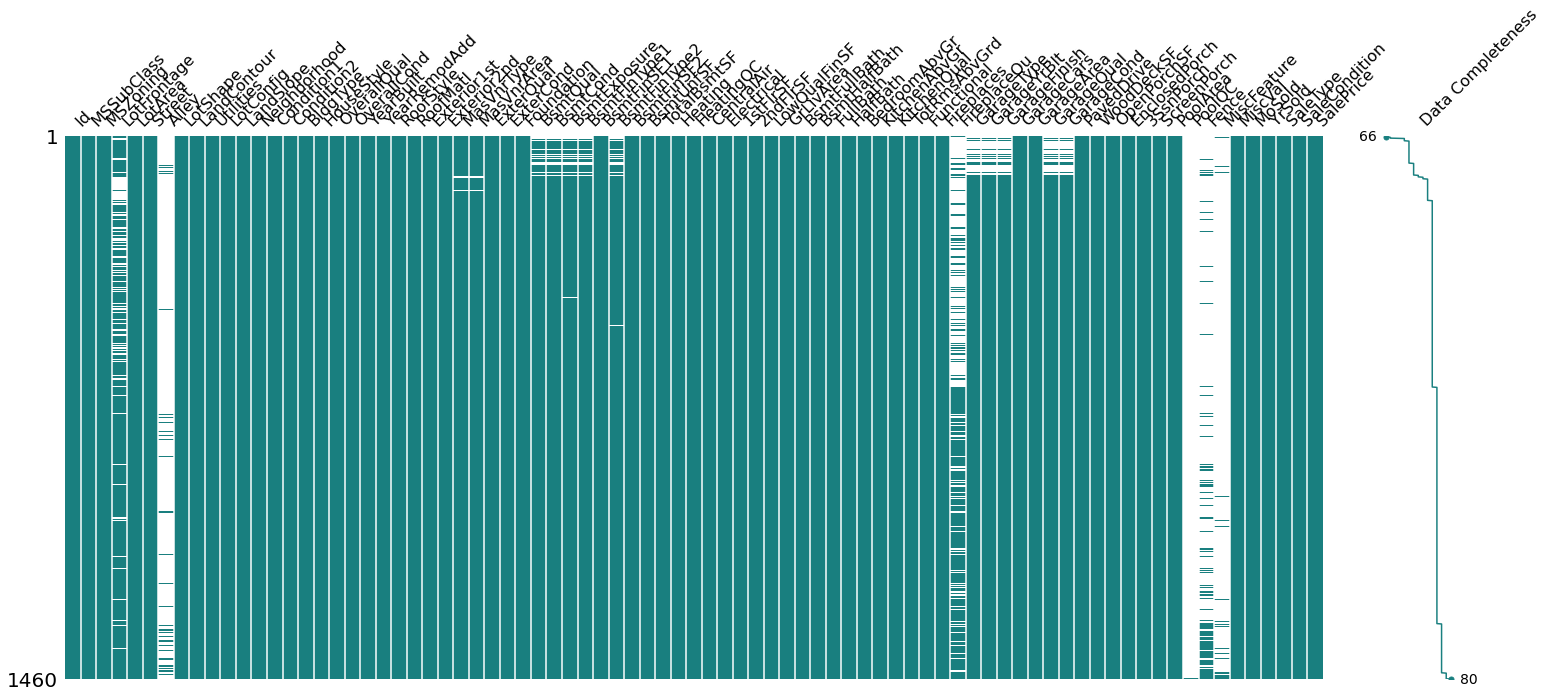

In [5]:
import missingno as msno
%matplotlib inline
msno.matrix(housing, labels=True, sort="ascending", color=(0.1, 0.5, 0.5));

In [6]:
# columns with more than 80 % missing data
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 80]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 4
Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


#### Inference
4 variables have more missing info. Data Dict understanding is necessary before imputing or dropping these columns

`Alley`: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

`PoolQC`: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

`Fence`: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

`MiscFeature`: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

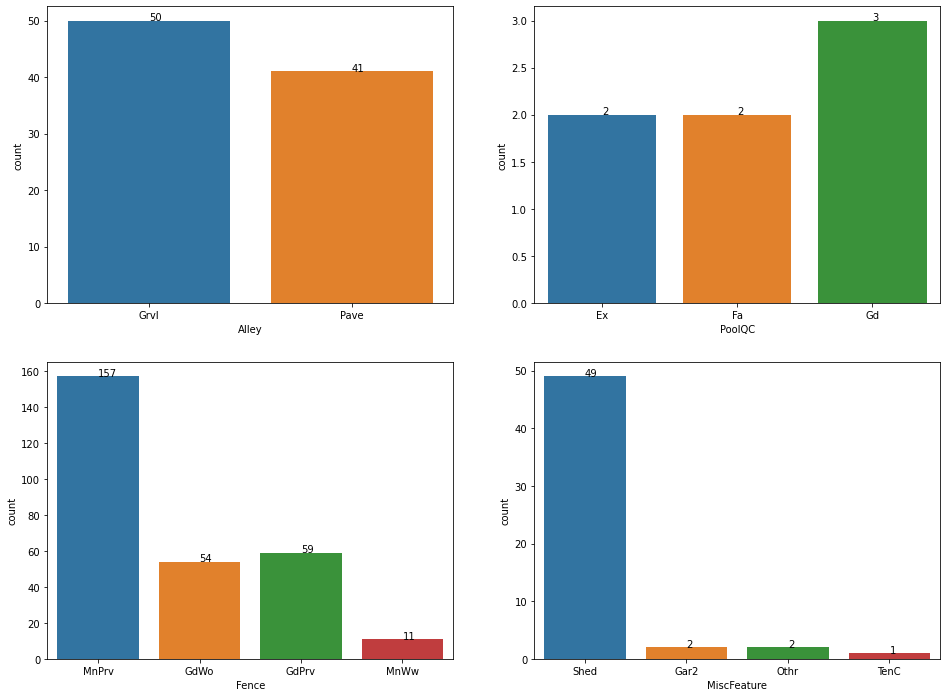

In [7]:
plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
splot = sns.countplot(housing.Alley);
for pt in splot.patches:
    splot.annotate(format(pt.get_height()), (pt.get_x() + pt.get_width() / 2., pt.get_height()))

plt.subplot(2,2,2)
splot = sns.countplot(housing.PoolQC);
for pt in splot.patches:
    splot.annotate(format(pt.get_height()), (pt.get_x() + pt.get_width() / 2., pt.get_height()))

plt.subplot(2,2,3)
splot = sns.countplot(housing.Fence);
for pt in splot.patches:
    splot.annotate(format(pt.get_height()), (pt.get_x() + pt.get_width() / 2., pt.get_height()))

plt.subplot(2,2,4)
splot = sns.countplot(housing.MiscFeature);
for pt in splot.patches:
    splot.annotate(format(pt.get_height()), (pt.get_x() + pt.get_width() / 2., pt.get_height()))

plt.show()

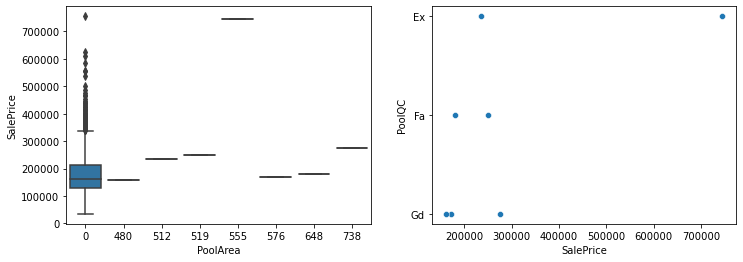

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.boxplot(x = housing.PoolArea, y = housing.SalePrice);
plt.subplot(1,2,2)
sns.scatterplot(data = housing, x = housing.SalePrice, y = housing.PoolQC);
plt.show()

#### Inference:
- `PoolArea` can be dropped as there are only 7 houses with pools. If this has to be dropped, then the analysis will exclude houses with Pool. In case of Train/Test split or the CV split, this data might be missed.

#### Pool size and the quality, the SalePrice is not correlating. So the Pool related data can be dropped

In [9]:
housing.drop(['PoolArea'], axis = 1, inplace = True)
housing.drop(['PoolQC'], axis = 1, inplace = True)

#### Inference `Alley`, `Fence` & `MiscFeature`
The Null values means the feature is not available. The null values can be imputed as No for further EDA

In [10]:
# Fill No for NULL values, based on the Data Disctionary
housing.Alley.fillna(value = "No", inplace = True)
housing.Fence.fillna(value = "No", inplace = True)
housing.MiscFeature.fillna(value = "No", inplace = True)

In [11]:
# Find other columns with missing data but that cannot be dropped
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 10]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 2
Index(['LotFrontage', 'FireplaceQu'], dtype='object')


In [12]:
print(housing.LotFrontage.isnull().value_counts())
print(housing.FireplaceQu.isnull().value_counts())

False    1201
True      259
Name: LotFrontage, dtype: int64
False    770
True     690
Name: FireplaceQu, dtype: int64


#### Null Lot Frontage impute with Zero and impute No for FireplaceQu

In [13]:
# Fill 'No' or 0 for NULL values, based on the Data Disctionary
housing.LotFrontage.fillna(value = 0, inplace = True)
housing.FireplaceQu.fillna(value = "No", inplace = True)

In [14]:
# Find other columns with missing data but that cannot be dropped
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 5]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 5
Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')


In [15]:
housing.GarageType.fillna(value = "No", inplace = True)
housing.GarageYrBlt.fillna(value = 0, inplace = True)
housing.GarageFinish.fillna(value = "No", inplace = True)
housing.GarageQual.fillna(value = "No", inplace = True)
housing.GarageCond.fillna(value = "No", inplace = True)

In [16]:
# Find other columns with missing data but that cannot be dropped
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 1]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 5
Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')


In [17]:
# Fill No for NULL values, based on the Data Disctionary
housing.BsmtQual.fillna(value = "No", inplace = True)
housing.BsmtCond.fillna(value = "No", inplace = True)
housing.BsmtExposure.fillna(value = "No", inplace = True)
housing.BsmtFinType1.fillna(value = "No", inplace = True)
housing.BsmtFinType2.fillna(value = "No", inplace = True)

In [18]:
# Find other columns with missing data that can be dropped
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 0]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 3
Index(['MasVnrType', 'MasVnrArea', 'Electrical'], dtype='object')


In [19]:
housing.shape

(1460, 79)

#### Dropping the Rows where the MasVnrType is NULL and Electrical is NULL

In [20]:
housing = housing[housing.MasVnrType.notnull()]
housing = housing[housing.Electrical.notnull()]

In [21]:
housing.shape

(1451, 79)

#### Dropping Erroneous data. MasVnrType is None but the MasVnrArea is greater than 0

In [22]:
MasVnrDrpIdx = housing[ (housing['MasVnrType'] == 'None') & (housing['MasVnrArea'] > 0) ].index
housing.drop(MasVnrDrpIdx , inplace=True)

In [23]:
housing.shape

(1446, 79)

In [24]:
# Recheck the missing Columns
missing_columns = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 0]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 0
Index([], dtype='object')


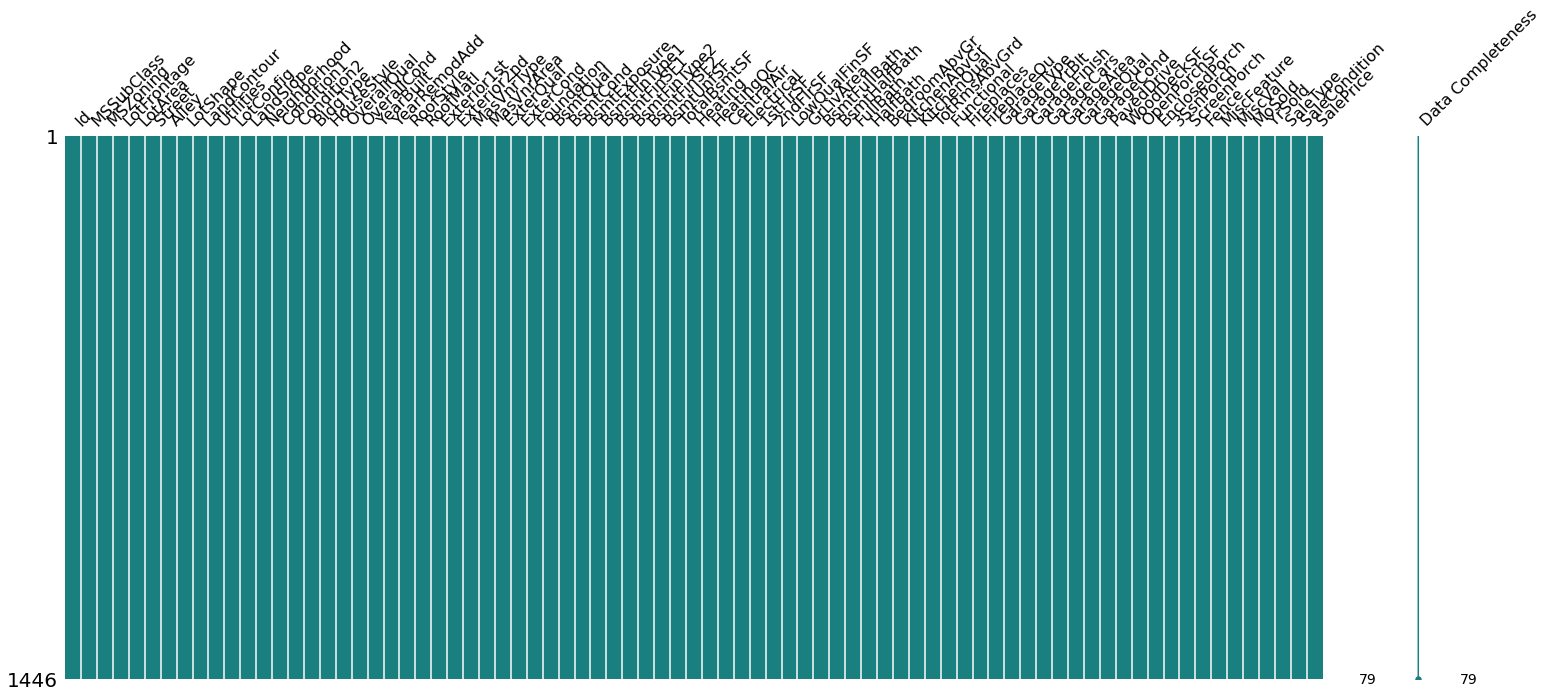

In [25]:
import missingno as msno
%matplotlib inline
msno.matrix(housing, labels=True, sort="ascending", color=(0.1, 0.5, 0.5));

### IQR Method for identifying the outlier columns

In [26]:
chk_cols = []
ign_cols = []
num_columns = list(housing.select_dtypes(include = "number"))
for col in num_columns:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1
    #print("IQR for", col, ":", IQR)    
    if (housing[((housing[col] < (Q1 - 1.5 * IQR)) |(housing[col] > (Q3 + 1.5 * IQR)))].shape[0] > 0):
        chk_cols.append(col)
    if (housing[((housing[col] < (Q1 - 1.5 * IQR)) |(housing[col] > (Q3 + 1.5 * IQR)))].shape[0] == 0):
        ign_cols.append(col)

print("Cols that has No outliers:", len(ign_cols), ign_cols)
print("Cols that has outliers > 0:", len(chk_cols), chk_cols)

Cols that has No outliers: 6 ['Id', 'YearRemodAdd', 'FullBath', 'HalfBath', 'MoSold', 'YrSold']
Cols that has outliers > 0: 31 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


#### Visualising columns with more than 100 outliers

In [27]:
chk_10_cols = []
for col in chk_cols:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1 
    if (housing[((housing[col] < (Q1 - 1.5 * IQR)) |(housing[col] > (Q3 + 1.5 * IQR)))].shape[0] > 100):
        print("IQR for", col, ":", IQR) 
        print(col, "has:",housing[((housing[col] < (Q1 - 1.5 * IQR)) |(housing[col] > (Q3 + 1.5 * IQR)))].shape[0])
        chk_10_cols.append(col)

IQR for MSSubClass : 50.0
MSSubClass has: 102
IQR for OverallCond : 1.0
OverallCond has: 124
IQR for BsmtFinSF2 : 0.0
BsmtFinSF2 has: 166
IQR for EnclosedPorch : 0.0
EnclosedPorch has: 206
IQR for ScreenPorch : 0.0
ScreenPorch has: 115


### Inference:
- `MSSubClass`, `OverallCond` will be converted as Categorical later
- `BsmtFinSF2`, `EnclosedPorch`, `ScreenPorch` to be treated

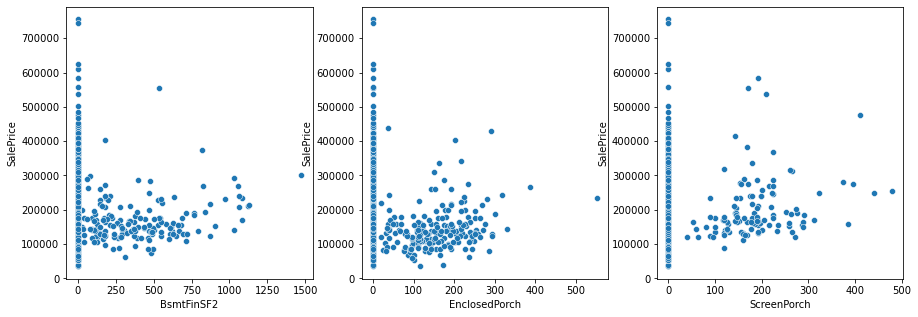

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.scatterplot(x = housing.BsmtFinSF2, y = housing.SalePrice);
plt.subplot(1,3,2)
sns.scatterplot(x = housing.EnclosedPorch, y = housing.SalePrice);
plt.subplot(1,3,3)
sns.scatterplot(x = housing.ScreenPorch, y = housing.SalePrice);
plt.show()

In [29]:
print(housing.EnclosedPorch.describe())
print(housing.ScreenPorch.describe())

count   1446.00
mean      21.93
std       61.12
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      552.00
Name: EnclosedPorch, dtype: float64
count   1446.00
mean      15.11
std       55.90
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      480.00
Name: ScreenPorch, dtype: float64


### Treating the outlier in Porch Area by combining the Porch area and the Types together

In [30]:
def Porch_chk(housing):
    
    if ((housing['OpenPorchSF'] != 0) & ((housing['EnclosedPorch'] != 0) | 
        (housing['3SsnPorch'] != 0) | (housing['ScreenPorch'] != 0))) :
        return 'Open & Enclosed'
    if ((housing['OpenPorchSF'] != 0) & (housing['EnclosedPorch'] == 0) & 
        (housing['3SsnPorch'] == 0) & (housing['ScreenPorch'] == 0)) :
        return 'Only Open'
    if ((housing['OpenPorchSF'] == 0) & 
        ((housing['EnclosedPorch'] != 0) | (housing['3SsnPorch'] != 0) | (housing['ScreenPorch'] != 0)) ) :
        return 'Only Enclosed'
    if ( (housing['OpenPorchSF'] == 0) & (housing['EnclosedPorch'] == 0) & 
        (housing['3SsnPorch'] == 0) & (housing['ScreenPorch'] == 0) ):
        return 'No'
housing['Porch'] = housing.apply(Porch_chk, axis = 1)

In [31]:
def Porch_area_calc(housing):
    
    if ((housing['OpenPorchSF'] != 0) & ((housing['EnclosedPorch'] != 0) | 
        (housing['3SsnPorch'] != 0) | (housing['ScreenPorch'] != 0))) :
        return (housing['OpenPorchSF'] + housing['EnclosedPorch'] + housing['3SsnPorch'] + housing['ScreenPorch'])
    if ((housing['OpenPorchSF'] != 0) & (housing['EnclosedPorch'] == 0) & 
        (housing['3SsnPorch'] == 0) & (housing['ScreenPorch'] == 0)) :
        return (housing['OpenPorchSF'] + housing['EnclosedPorch'] + housing['3SsnPorch'] + housing['ScreenPorch'])
    if ((housing['OpenPorchSF'] == 0) & 
        ((housing['EnclosedPorch'] != 0) | (housing['3SsnPorch'] != 0) | (housing['ScreenPorch'] != 0)) ) :
        return (housing['OpenPorchSF'] + housing['EnclosedPorch'] + housing['3SsnPorch'] + housing['ScreenPorch'])
    if ( (housing['OpenPorchSF'] == 0) & (housing['EnclosedPorch'] == 0) & 
        (housing['3SsnPorch'] == 0) & (housing['ScreenPorch'] == 0) ):
        return 0
housing['Porch_Area'] = housing.apply(Porch_area_calc, axis = 1)

In [32]:
housing.Porch_Area.value_counts()

0      454
36      26
40      20
45      18
48      18
      ... 
340      1
106      1
235      1
293      1
316      1
Name: Porch_Area, Length: 286, dtype: int64

<AxesSubplot:xlabel='Porch_Area', ylabel='SalePrice'>

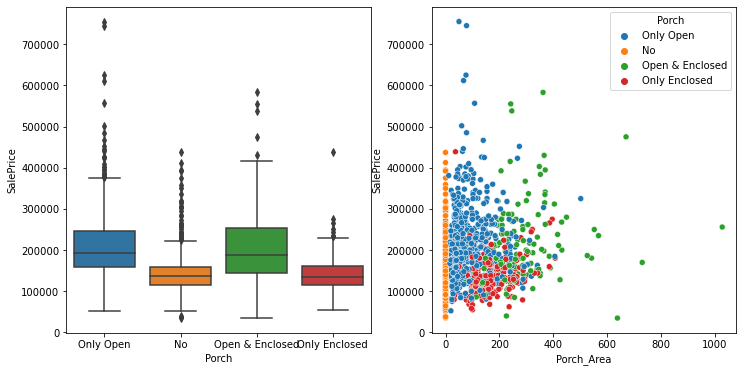

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.boxplot(x = housing.Porch, y = housing.SalePrice);
plt.subplot(1,2,2)
sns.scatterplot(x = housing.Porch_Area, y = housing.SalePrice, hue = housing.Porch)

In [34]:
housing.shape

(1446, 81)

- OpenPorchSF, 
- EnclosedPorch, 3SsnPorch, ScreenPorch: Combined as Enclosed Porch
- From the square feet of the Porch types, Porch Types classified and their respective area is summed up

`Porch` and `Porch_Area` will be used for further analysis

`OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch` shall be Dropped

In [35]:
housing.drop(['OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

In [36]:
housing.shape

(1446, 77)

`TotalBsmtSF` = `BsmtFinSF1` + `BsmtFinSF2` + `BsmtUnfSF`

`BsmtFinSF2` has outliers and others don't have outliers, so `BsmtFinSF2` shall be dropped, as the value is retained implicitly in `TotalBsmtSF`

In [37]:
housing.drop(['BsmtFinSF2'], axis = 1, inplace = True)

In [38]:
housing.shape

(1446, 76)

#### Re-check Outliers

In [39]:
chk_10_cols = []
num_columns = list(housing.select_dtypes(include = "number"))
for col in num_columns:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1 
    if (housing[((housing[col] < (Q1 - 1.5 * IQR)) |(housing[col] > (Q3 + 1.5 * IQR)))].shape[0] >= 50):
        #print("IQR for", col, ":", IQR) 
        print(col, "has:",housing[((housing[col] < (Q1 - 1.5 * IQR)) |(housing[col] > (Q3 + 1.5 * IQR)))].shape[0])
        chk_10_cols.append(col)

MSSubClass has: 102
LotArea has: 66
OverallCond has: 124
MasVnrArea has: 98
TotalBsmtSF has: 60
BsmtHalfBath has: 82
KitchenAbvGr has: 66
GarageYrBlt has: 81
MiscVal has: 51
SalePrice has: 60


In [40]:
housing["BsmtHalfBath"] = housing.BsmtHalfBath.replace({0: 'No', 1: 'Yes', 2: 'Yes'})
#housing["KitchenAbvGr"] = housing.KitchenAbvGr.replace({0: 'No', 1: 'Yes', 2: 'Yes+', 3: 'Yes+'})

### Inference:
- `MSSubClass`, `OverallCond` will be converted as Categorical later
- `GarageYrBlt`, `MiscVal` to be checked

### Outlier on Target variable `SalePrice` removed before exploring the data from better interpretation

In [41]:
Q1 = housing['SalePrice'].quantile(0.25)
Q3 = housing['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print("IQR for", 'SalePrice', ":", IQR)    
print("SalePrice has:",housing[((housing['SalePrice'] < (Q1 - 1.5 * IQR)) |(housing['SalePrice'] > (Q3 + 1.5 * IQR)))].shape[0],"outliers")
housing = housing[~((housing['SalePrice'] < (Q1 - 1.5 * IQR)) |(housing['SalePrice'] > (Q3 + 1.5 * IQR)))]

print("Percentage of data lost after Missing Value treatment and Dropping Outliers: {:.2f}%".format((1-(housing.shape[0])/(old_shape))*100))


IQR for SalePrice : 84100.0
SalePrice has: 60 outliers
Percentage of data lost after Missing Value treatment and Dropping Outliers: 5.07%


## Step 2: Data Exploration and converting data types

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       *150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

20 and 30 can be made as 1_Story, as the Year build column will give the age

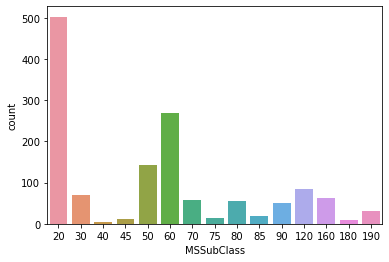

In [42]:
sns.countplot(x = housing.MSSubClass);

#### YearBuilt and Year Remodel will help understand the new or old. So classifying the SubClass based on Story and Levels

In [43]:
housing["MSSubClass"] = housing.MSSubClass.replace({20: '1S', 30: '1S', 40: '1S', 45 : '1.5S_UF', 50 : '1.5S_F', 
                                                    60 : '2S', 70 : '2S', 75 : '2.5S', 80 : 'SL', 85 : 'SL', 90 : 'Dup',
                                                   120: '1S_PUD', 160: '2S_PUD', 180: 'ML_PUD', 190: '2FC'})

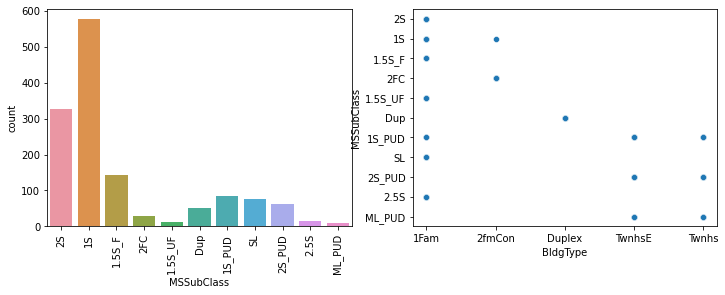

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.countplot(x = housing.MSSubClass)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.scatterplot(x = housing.BldgType, y = housing.MSSubClass)
plt.show()

#### Not much relationship between SubClass and the Bldg Type

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

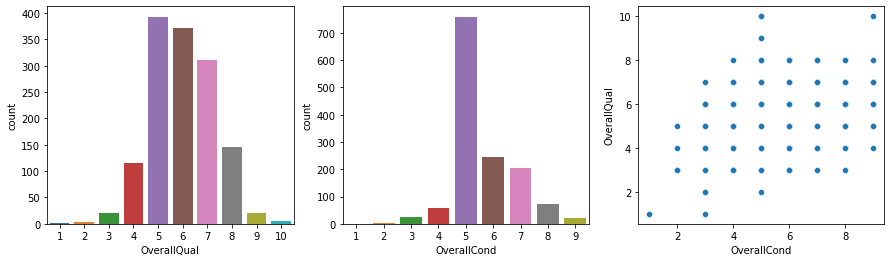

In [45]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.countplot(x = housing.OverallQual)
plt.subplot(1,3,2)
sns.countplot(x = housing.OverallCond)
plt.subplot(1,3,3)
sns.scatterplot(x = housing.OverallCond, y = housing.OverallQual)
plt.show()

#### Classifying the OverallQuality and OverallCond into 5 grades

In [46]:
housing["OverallQual"] = housing.OverallQual.replace({1: 'Poor', 2: 'Poor', 3: 'Poor', 4: 'bAvg', 5 : 'Avg', 6 : 'Avg', 
                                                          7 : 'Good', 8 : 'Good', 9 : 'Ex', 10 : 'Ex'})

housing["OverallCond"] = housing.OverallCond.replace({1: 'Poor', 2: 'Poor', 3: 'Poor', 4: 'bAvg', 5 : 'Avg', 6 : 'Avg', 
                                                          7 : 'Good', 8 : 'Good', 9 : 'Ex'})

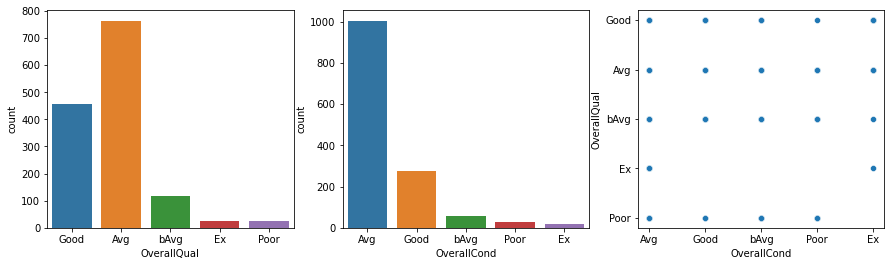

In [47]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.countplot(x = housing.OverallQual)
plt.subplot(1,3,2)
sns.countplot(x = housing.OverallCond)
plt.subplot(1,3,3)
sns.scatterplot(x = housing.OverallCond, y = housing.OverallQual)
plt.show()

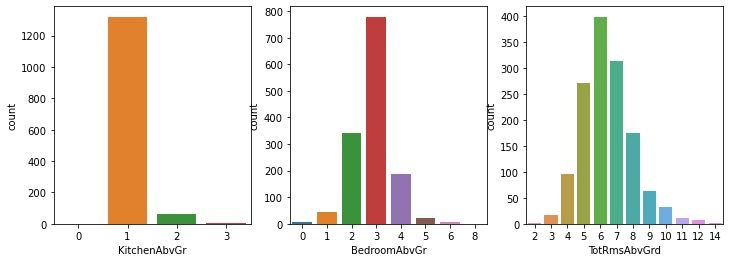

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
sns.countplot(x = housing.KitchenAbvGr)
plt.subplot(1,3,2)
sns.countplot(x = housing.BedroomAbvGr)
plt.subplot(1,3,3)
sns.countplot(x = housing.TotRmsAbvGrd)
plt.show()

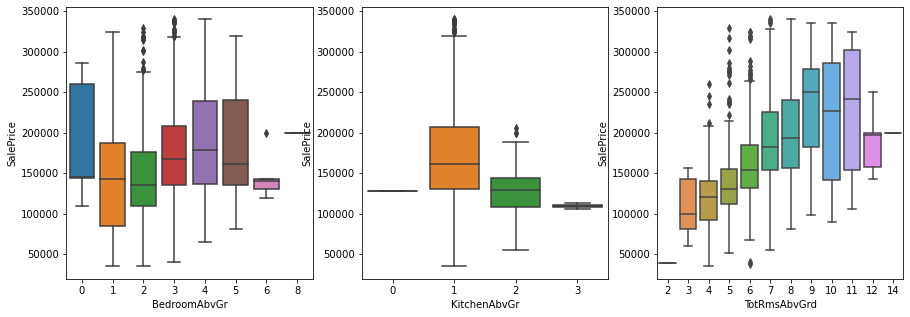

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x = housing.BedroomAbvGr, y = housing.SalePrice)
plt.subplot(1,3,2)
sns.boxplot(x = housing.KitchenAbvGr, y = housing.SalePrice)
plt.subplot(1,3,3)
sns.boxplot(x = housing.TotRmsAbvGrd, y = housing.SalePrice)
plt.show()

#### Leaving the BedroomAbvGr, KitchenAbvGr & TotRmsAbvGrd as numerical

In [50]:
#housing["BedroomAbvGr"] = housing.BedroomAbvGr.replace({0: 'LT_3', 1: 'LT_3', 2: 'LT_3', 3: '3_GT', 
#                                                        4: '3_GT', 5: '3_GT', 6: '3_GT', 8: '3_GT'})
#housing["KitchenAbvGr"] = housing.KitchenAbvGr.replace({0: 'No', 1: 'Yes', 2: 'Yes+', 3: 'Yes+'})

In [51]:
housing.BedroomAbvGr.value_counts()

3    779
2    342
4    186
1     45
5     21
6      7
0      5
8      1
Name: BedroomAbvGr, dtype: int64

In [52]:
DrpIdx = housing[ (housing['KitchenAbvGr'] == 0) ].index
housing.drop(DrpIdx , inplace=True)

#### Seems Numerical and need not be converted into categorical

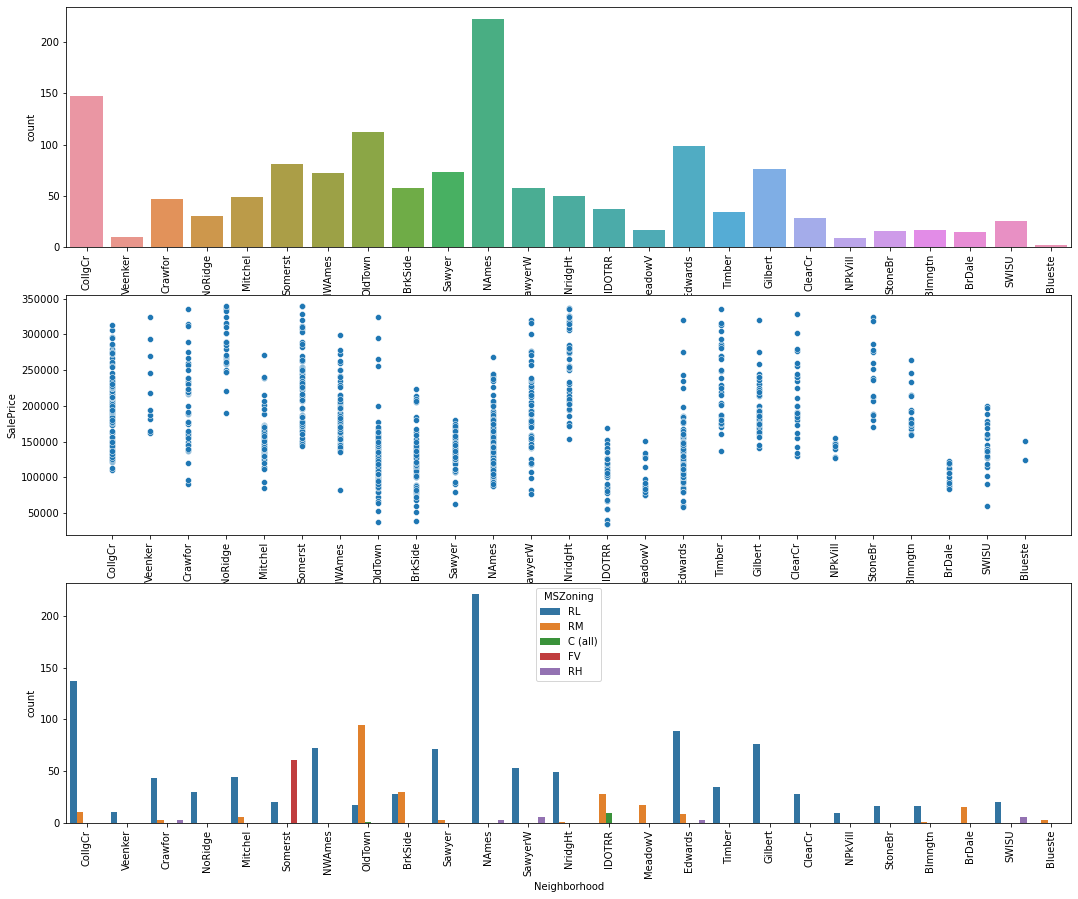

In [53]:
plt.figure(figsize=(18, 15))
plt.subplot(3,1,1)
sns.countplot(housing.Neighborhood)
plt.xticks(rotation=90)
plt.subplot(3,1,2)
sns.scatterplot(y = housing.SalePrice, x = housing.Neighborhood)
plt.xticks(rotation=90)
plt.subplot(3,1,3)
sns.countplot(hue = housing.MSZoning, x = housing.Neighborhood)
housing.MSZoning.value_counts()
plt.xticks(rotation=90)
plt.show()

#### Inference: 
- Many houses seems to be near NAmes and the prices are lower relatively
- NoRidge, NridgHt, StoneBr number of houses is less but the price is higher relatively
- NoRidge has the upper `outlier` for SalePrice

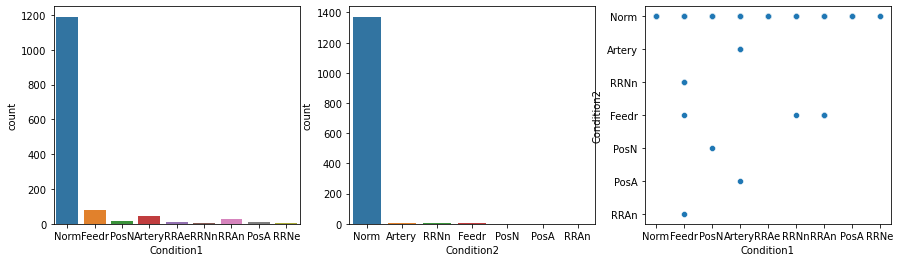

In [54]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.countplot(x = housing.Condition1)
plt.subplot(1,3,2)
sns.countplot(x = housing.Condition2)
plt.subplot(1,3,3)
sns.scatterplot(x = housing.Condition1, y = housing.Condition2)
plt.show()

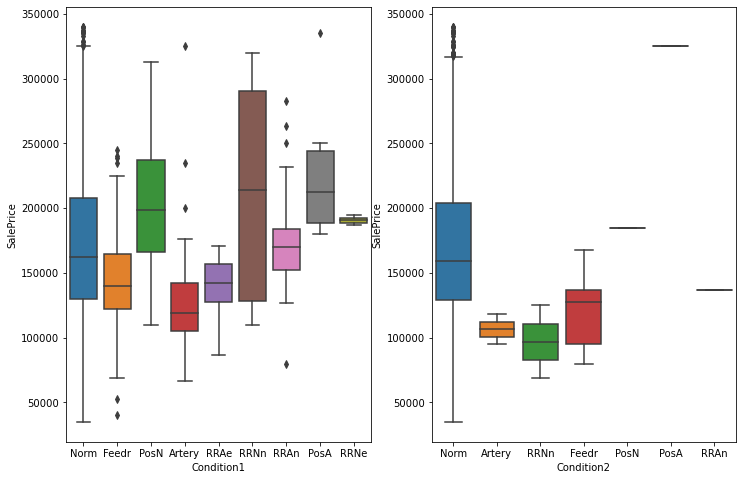

In [55]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.boxplot(x = housing.Condition1, y = housing.SalePrice)
plt.subplot(1,2,2)
sns.boxplot(x = housing.Condition2, y = housing.SalePrice)
plt.show()

In [56]:
housing.Condition1.value_counts()

Norm      1190
Feedr       79
Artery      47
RRAn        25
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

#### Inference: 
- PosN & PosA in both Condition1 and Condition2 has the mean SalePrice higher than Norm.
- In Condition1, the 25th percentile of RR is higher than Feedr and is higher than Artery
- The RR and POS can be combined together - Condition 1
- The Data points for Condition2 is very less. So it can be made as Yes/No

In [57]:
housing["Condition1"] = housing.Condition1.replace({'PosN': 'Pos', 'PosA': 'Pos',
                                                   'RRAn': 'RR', 'RRAe': 'RR', 
                                                   'RRNn': 'RR', 'RRNe': 'RR'})

housing["Condition2"] = housing.Condition2.replace({'Feedr': 'Others', 'Artery': 'Others',
                                                    'RRNn': 'Others', 'PosN': 'Others',
                                                    'PosA': 'Others','RRAn': 'Others',
                                                    'RRAe': 'Others'})

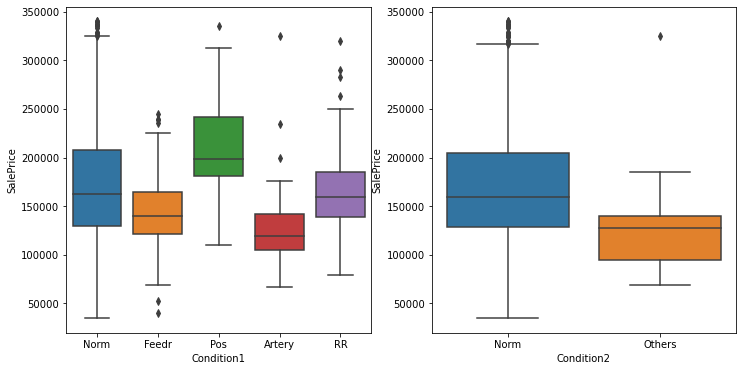

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.boxplot(x = housing.Condition1, y = housing.SalePrice)
plt.subplot(1,2,2)
sns.boxplot(x = housing.Condition2, y = housing.SalePrice)
plt.show()

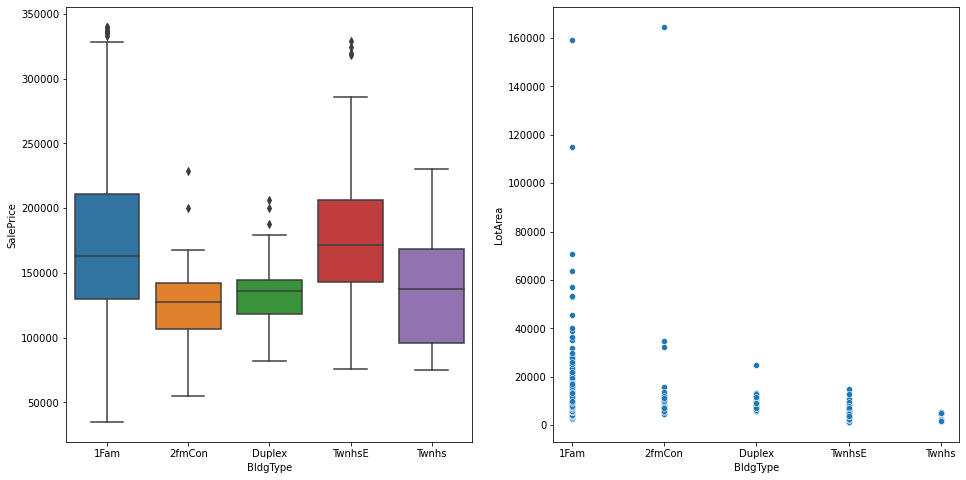

In [59]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.boxplot(x = housing.BldgType, y = housing.SalePrice)
plt.subplot(1,2,2)
sns.scatterplot(x = housing.BldgType, y = housing.LotArea)
plt.show()

#### Inference: 
- Though the lot area of Townhouse End Unit is less, the price is higher than 1Fam
- Though the lot area of 2fmCon is similar, the price is lower than 1Fam

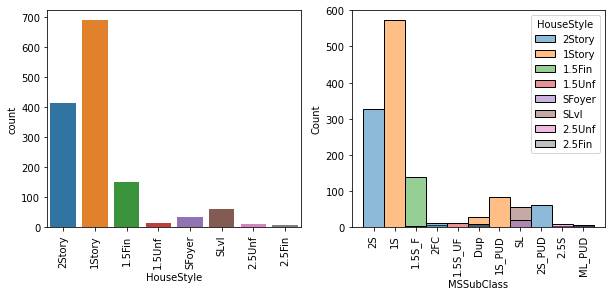

In [60]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.countplot(housing.HouseStyle)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(x = housing.MSSubClass, hue = housing.HouseStyle)
plt.xticks(rotation=90)
plt.show()

#### Inference: 
- Some mis-matches between MSSubClass and HouseStyle:
    - 2.5Fin in 1S?

#### Dropping the anamoly

In [61]:
DrpIdx = housing[ (housing['MSSubClass'] == '1S') & (housing['HouseStyle'] == '2.5Fin') ].index
DrpIdx
housing.drop(DrpIdx , inplace=True)

In [62]:
DrpIdx = housing[ (housing['MSSubClass'] == '1S') & (housing['HouseStyle'] == '2Story') ].index
DrpIdx
housing.drop(DrpIdx , inplace=True)

#### Inference:
MSSubClass and HouseStyle are infering the same and seems highly correlated and one can be dropped

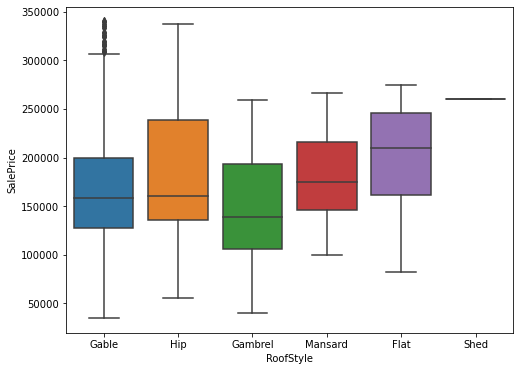

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = housing.RoofStyle, y = housing.SalePrice)
plt.show()

In [64]:
housing.RoofStyle.value_counts()

Gable      1107
Hip         246
Flat         12
Gambrel      11
Mansard       7
Shed          1
Name: RoofStyle, dtype: int64

#### `Flat`, `Mansard` & `Shed` the data points are less and has relatively higher `SalePrice`, So combining them together

In [65]:
housing["RoofStyle"] = housing.RoofStyle.replace({'Mansard': 'Others', 'Flat': 'Others',
                                                   'Shed': 'Others'})

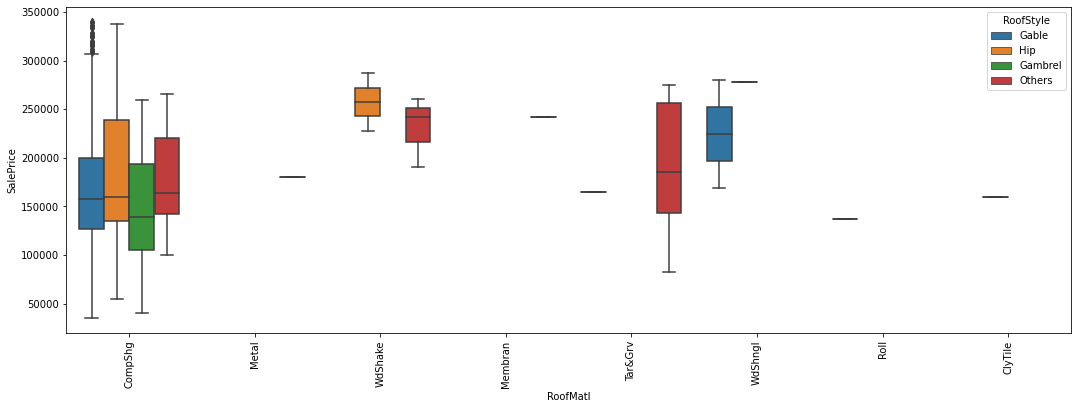

In [66]:
plt.figure(figsize=(18, 6))
sns.boxplot(x = housing.RoofMatl, y = housing.SalePrice, hue = housing.RoofStyle)
plt.xticks(rotation=90)
plt.show()

In [67]:
housing.RoofMatl.value_counts()

CompShg    1362
Tar&Grv      10
WdShake       5
WdShngl       3
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [68]:
housing["RoofMatl"] = housing.RoofMatl.replace({'WdShake': 'Others', 'WdShngl': 'Others',
                                                   'Metal': 'Others', 'Membran': 'Others', 
                                                   'Roll': 'Others', 'ClyTile': 'Others'})

In [69]:
housing.RoofMatl.value_counts()

CompShg    1362
Others       12
Tar&Grv      10
Name: RoofMatl, dtype: int64

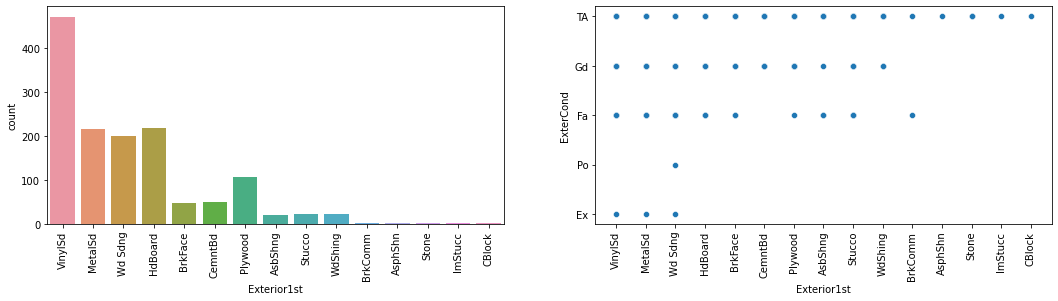

In [70]:
plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
sns.countplot(housing.Exterior1st)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.scatterplot(x = housing.Exterior1st, y = housing.ExterCond)
plt.xticks(rotation=90)
plt.show()

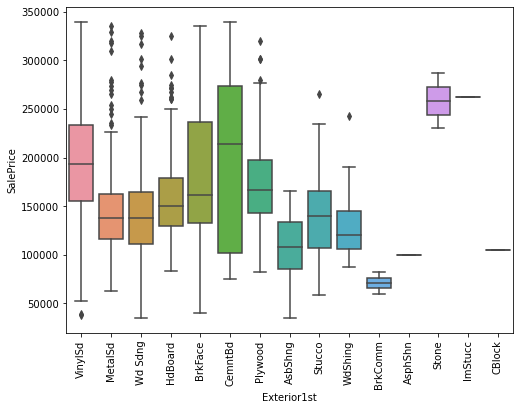

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = housing.Exterior1st, y = housing.SalePrice)
plt.xticks(rotation=90)
plt.show()

In [72]:
housing.Exterior1st.value_counts()

VinylSd    472
HdBoard    219
MetalSd    216
Wd Sdng    201
Plywood    106
CemntBd     50
BrkFace     47
Stucco      23
WdShing     23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

#### Other than Top 5 counts combined as others

In [73]:
housing["Exterior1st"] = housing.Exterior1st.replace({'CemntBd': 'Others', 'BrkFace': 'Others',
                                                   'WdShing': 'Others', 'Stucco': 'Others', 
                                                   'AsbShng': 'Others', 'BrkComm': 'Others',
                                                     'Stone': 'Others', 'AsphShn': 'Others',
                                                     'ImStucc': 'Others', 'CBlock': 'Others',})

In [74]:
housing.Exterior2nd.value_counts()

VinylSd    461
MetalSd    210
HdBoard    204
Wd Sdng    193
Plywood    140
CmentBd     49
Wd Shng     35
Stucco      25
BrkFace     23
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [75]:
housing["Exterior2nd"] = housing.Exterior2nd.replace({'CmentBd': 'Others', 'Wd Shng': 'Others',
                                                   'BrkFace': 'Others', 'Stucco': 'Others', 
                                                   'AsbShng': 'Others', 'ImStucc': 'Others',
                                                     'Stone': 'Others', 'AsphShn': 'Others',
                                                     'Brk Cmn': 'Others', 'CBlock': 'Others','Other': 'Others'})

In [76]:
housing.Exterior2nd.value_counts()

VinylSd    461
MetalSd    210
HdBoard    204
Wd Sdng    193
Others     176
Plywood    140
Name: Exterior2nd, dtype: int64

In [77]:
housing.MasVnrType.value_counts()

None       847
BrkFace    417
Stone      105
BrkCmn      15
Name: MasVnrType, dtype: int64

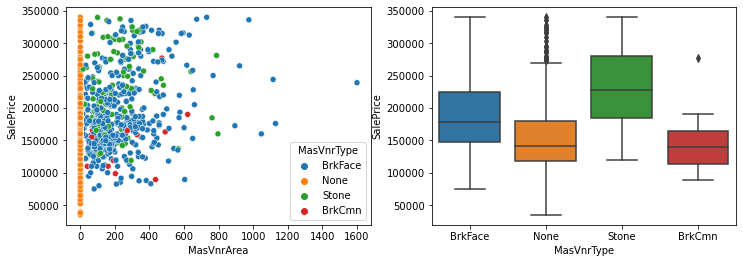

In [78]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.scatterplot(x = housing.MasVnrArea, y = housing.SalePrice, hue = housing.MasVnrType);
plt.subplot(1,2,2)
sns.boxplot(x = housing.MasVnrType, y = housing.SalePrice);
plt.show()

#### When the MasVnrArea increases the Base SalePrice increases irrespective of Type except for BrkCmn (but only few data points)

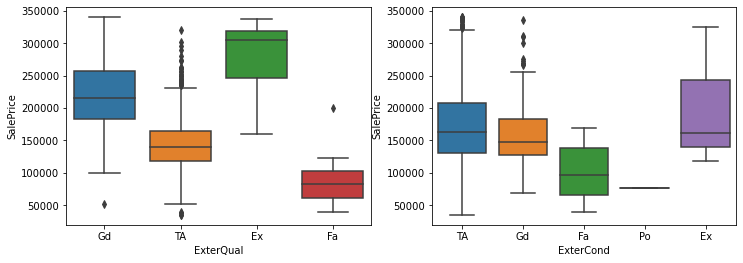

In [79]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.ExterQual)
plt.subplot(1,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.ExterCond)
plt.show()

In [80]:
DrpIdx = housing[ (housing['ExterCond'] == 'Po')].index
housing.drop(DrpIdx , inplace=True)

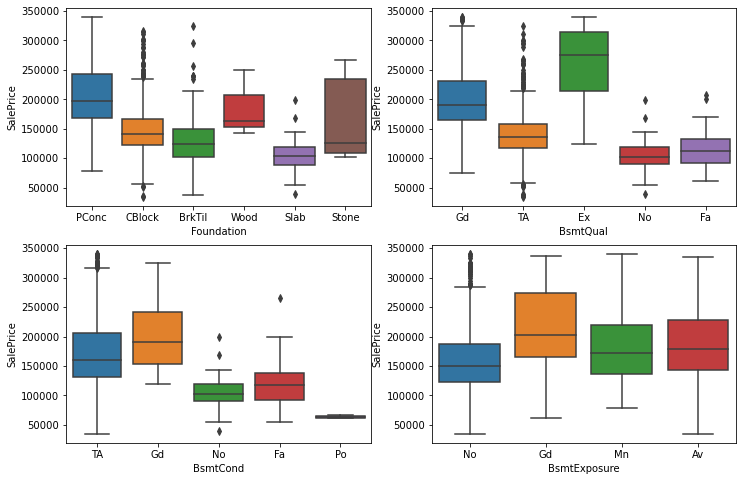

In [81]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.Foundation)
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtQual)
plt.subplot(2,2,3)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtCond)
plt.subplot(2,2,4)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtExposure)
plt.show()

In [82]:
housing.Foundation.value_counts()

CBlock    622
PConc     583
BrkTil    145
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [83]:
housing.BsmtFinType1.value_counts()

Unf    415
GLQ    364
ALQ    218
BLQ    147
Rec    129
LwQ     73
No      37
Name: BsmtFinType1, dtype: int64

In [84]:
DrpIdx = housing[ (housing['BsmtCond'] == 'Po')].index
housing.drop(DrpIdx , inplace=True)

In [85]:
housing["BsmtQual"] = housing.BsmtQual.replace({'No': 'No_Fa', 'Fa': 'No_Fa'})
housing["BsmtCond"] = housing.BsmtQual.replace({'No': 'No_Fa', 'Fa': 'No_Fa'})

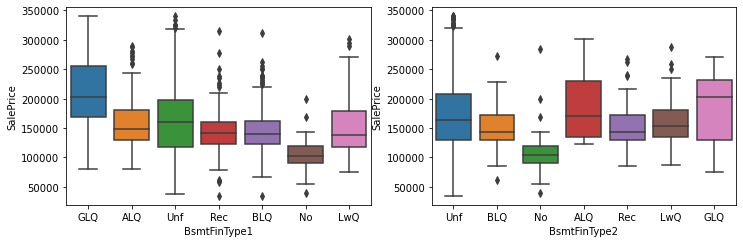

In [86]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtFinType1)
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtFinType2)
plt.show()

#### Inference:
BsmtFinType1: `BLQ`, `Rec`, `ALQ`, `LwQ` has similar cost impact


	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [87]:
housing["BsmtFinType1"] = housing.BsmtFinType1.replace({'ALQ': 'Avg2LQlty', 'BLQ': 'Avg2LQlty','Rec': 'Avg2LQlty',
                                                        'LwQ': 'Avg2LQlty',})

housing["BsmtFinType2"] = housing.BsmtFinType2.replace({'ALQ': 'Avg2LQlty', 'BLQ': 'Avg2LQlty','Rec': 'Avg2LQlty',
                                                        'LwQ': 'Avg2LQlty',})

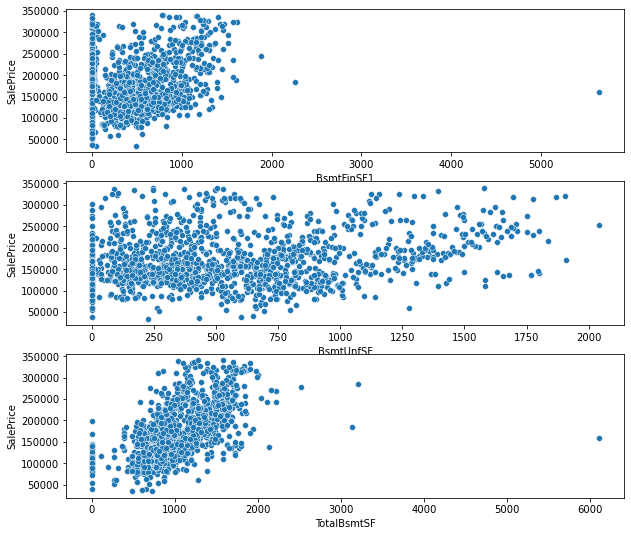

In [88]:
plt.figure(figsize=(10, 9))
plt.subplot(3,1,1)
sns.scatterplot(y = housing.SalePrice, x = housing.BsmtFinSF1)
plt.subplot(3,1,2)
sns.scatterplot(y = housing.SalePrice, x = housing.BsmtUnfSF)
plt.subplot(3,1,3)
sns.scatterplot(y = housing.SalePrice, x = housing.TotalBsmtSF)
plt.show()

In [89]:
housing.Heating.value_counts()

GasA     1350
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

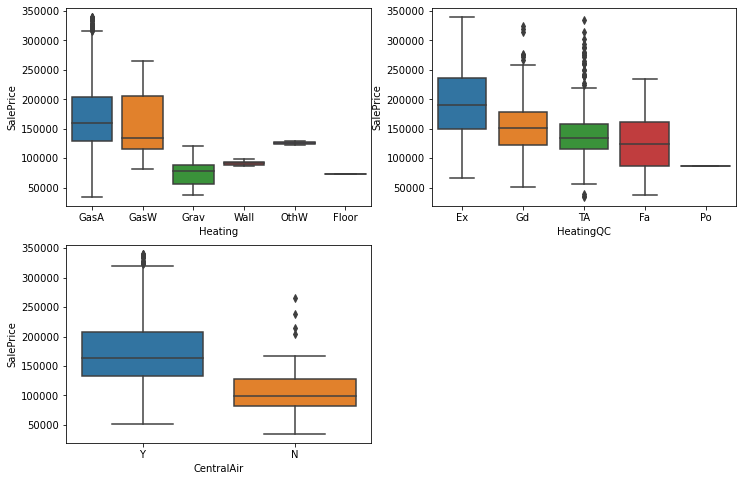

In [90]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.Heating)
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.HeatingQC)
plt.subplot(2,2,3)
sns.boxplot(y = housing.SalePrice, x = housing.CentralAir)
plt.show()

In [91]:
housing["Heating"] = housing.Heating.replace({'Wall': 'Others', 'OthW': 'Others', 'Floor': 'Others', 'Grav': 'Others'})

In [92]:
DrpIdx = housing[ (housing['HeatingQC'] == 'Po')].index
housing.drop(DrpIdx , inplace=True)

In [93]:
housing["HeatingQC"] = housing.HeatingQC.replace({'TA': 'Fa_TA', 'Fa': 'Fa_TA'})

In [94]:
housing.Electrical.value_counts()

SBrkr    1259
FuseA      92
FuseF      26
FuseP       3
Name: Electrical, dtype: int64

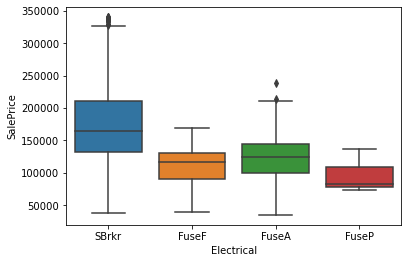

In [95]:
sns.boxplot(y = housing.SalePrice, x = housing.Electrical);

In [96]:
housing["Electrical"] = housing.Electrical.replace({'FuseF': 'Fuse', 'FuseA': 'Fuse', 'FuseP': 'Fuse'})

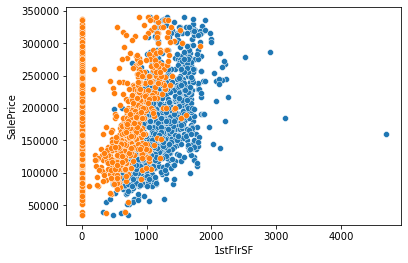

In [97]:
sns.scatterplot(y = housing.SalePrice, x = housing["1stFlrSF"]);
sns.scatterplot(y = housing.SalePrice, x = housing["2ndFlrSF"]);

In [98]:
housing["LowQualFinSF"].value_counts()

0      1355
80        3
360       2
515       1
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [99]:
def LowQualFinSF_chk(housing):
    
    if ((housing['LowQualFinSF'] != 0)):
        return 'Yes'
    else:
        return 'No'
housing['LowQualFinSF'] = housing.apply(LowQualFinSF_chk, axis = 1)

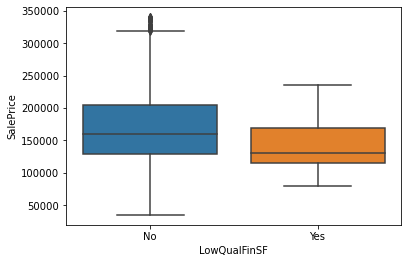

In [100]:
sns.boxplot(y = housing.SalePrice, x = housing["LowQualFinSF"]);

In [101]:
housing.GrLivArea.value_counts()

864     22
1040    14
894     11
848     10
1456    10
        ..
1960     1
1322     1
899      1
886      1
1256     1
Name: GrLivArea, Length: 804, dtype: int64

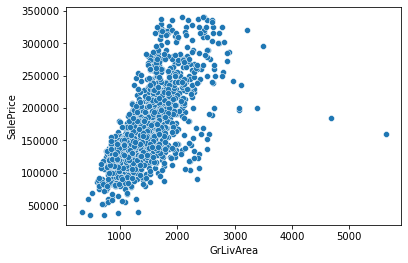

In [102]:
sns.scatterplot(y = housing.SalePrice, x = housing["GrLivArea"]);

In [103]:
housing.BsmtHalfBath.value_counts()

No     1301
Yes      79
Name: BsmtHalfBath, dtype: int64

In [104]:
print(housing.FullBath.value_counts())
print(housing.HalfBath.value_counts())

2    715
1    640
3     18
0      7
Name: FullBath, dtype: int64
0    884
1    486
2     10
Name: HalfBath, dtype: int64


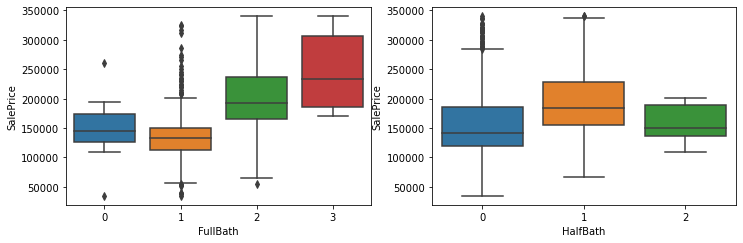

In [105]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.FullBath)
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.HalfBath)
plt.show()

In [106]:
housing["FullBath"] = housing.FullBath.replace({0: '0_1', 1: '0_1', 2: '2_3', 3: '2_3'})
housing["HalfBath"] = housing.HalfBath.replace({1: '1+', 2: '1+'})

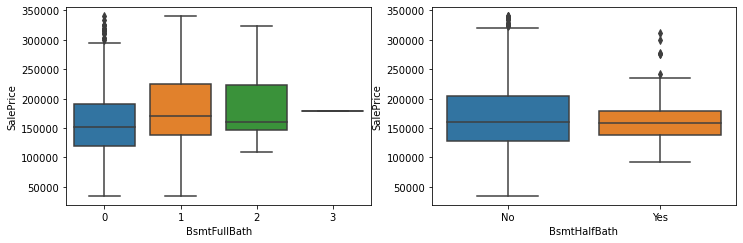

In [107]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtFullBath)
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.BsmtHalfBath)
plt.show()

In [108]:
housing.BsmtFullBath.value_counts()

0    829
1    537
2     13
3      1
Name: BsmtFullBath, dtype: int64

In [109]:
housing["BsmtFullBath"] = housing.BsmtFullBath.replace({0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes'})

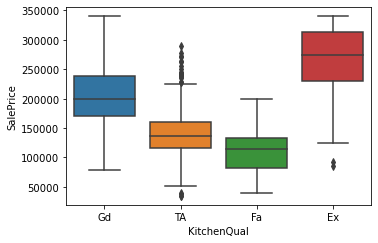

In [110]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.KitchenQual)
plt.show()

In [111]:
housing.KitchenQual.value_counts()

TA    725
Gd    557
Ex     61
Fa     37
Name: KitchenQual, dtype: int64

In [112]:
housing["KitchenQual"] = housing.KitchenQual.replace({'TA': 'Fa_TA', 'Fa': 'Fa_TA'})

In [113]:
housing.Functional.value_counts()

Typ     1287
Min2      33
Min1      30
Mod       13
Maj1      12
Maj2       4
Sev        1
Name: Functional, dtype: int64

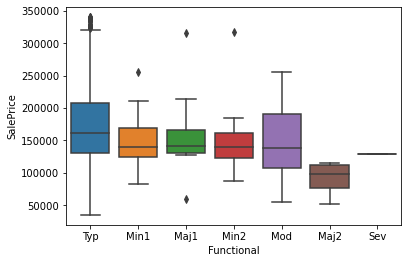

In [114]:
sns.boxplot(y = housing.SalePrice, x = housing.Functional);

In [115]:
housing["Functional"] = housing.Functional.replace({'Min1': 'non_Typ', 'Maj1': 'non_Typ', 'Min2': 'non_Typ',
                                                    'Mod': 'non_Typ', 'Maj2': 'non_Typ', 'Sev': 'non_Typ'})

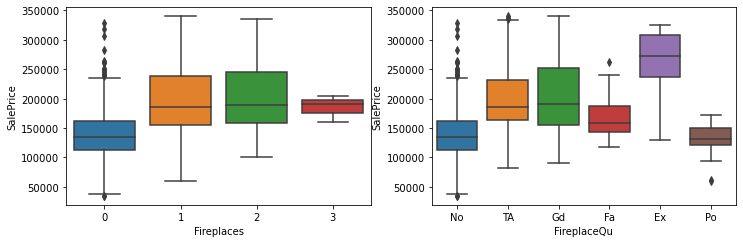

In [116]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.Fireplaces)
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.FireplaceQu)
plt.show()

In [117]:
housing.FireplaceQu.value_counts()

No    676
Gd    339
TA    298
Fa     33
Po     20
Ex     14
Name: FireplaceQu, dtype: int64

In [118]:
housing["Fireplaces"] = housing.Fireplaces.replace({0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes'})

In [119]:
housing["FireplaceQu"] = housing.FireplaceQu.replace({'TA': 'Fa_TA_Gd', 'Gd': 'Fa_TA_Gd', 'Fa': 'Fa_TA_Gd', 
                                                      'Po': 'No'})

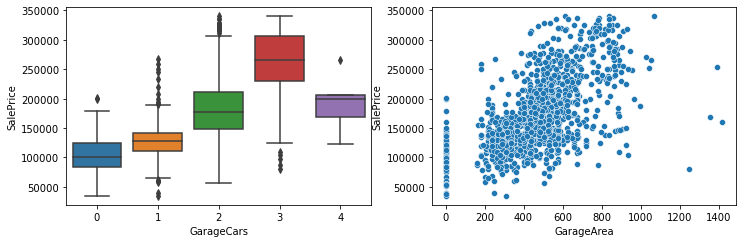

In [120]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.GarageCars)
plt.subplot(2,2,2)
sns.scatterplot(y = housing.SalePrice, x = housing.GarageArea)
plt.show()

In [121]:
housing.GarageCars.value_counts()

2    805
1    366
3    126
0     78
4      5
Name: GarageCars, dtype: int64

In [122]:
housing.PavedDrive.value_counts()

Y    1262
N      88
P      30
Name: PavedDrive, dtype: int64

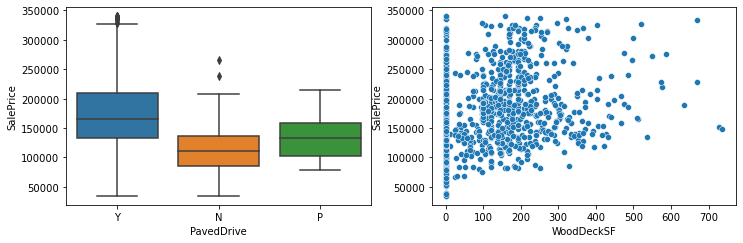

In [123]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.PavedDrive)
plt.subplot(2,2,2)
sns.scatterplot(y = housing.SalePrice, x = housing.WoodDeckSF)
plt.show()

In [124]:
housing.WoodDeckSF.describe()

count   1380.00
mean      90.09
std      122.10
min        0.00
25%        0.00
50%        0.00
75%      166.50
max      736.00
Name: WoodDeckSF, dtype: float64

In [125]:
housing.Fence.value_counts()

No       1104
MnPrv     155
GdPrv      58
GdWo       52
MnWw       11
Name: Fence, dtype: int64

In [126]:
housing["Fence"] = housing.Fence.replace({'MnPrv': 'Yes', 'GdWo': 'Yes', 'GdPrv': 'Yes', 'MnWw': 'Yes'})

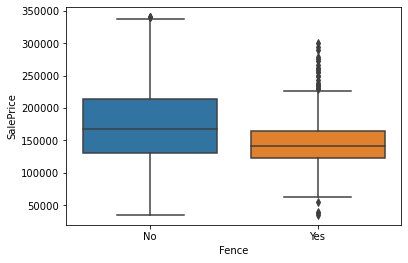

In [127]:
sns.boxplot(y = housing.SalePrice, x = housing.Fence);

In [128]:
housing.Fence.value_counts()

No     1104
Yes     276
Name: Fence, dtype: int64

#### Inference: 
- with Fence and without Fence - no much difference in the Target variable (SalePrice). This feature shall be dropped

In [129]:
housing.drop(['Fence'], axis = 1, inplace = True)

In [130]:
housing.shape

(1380, 75)

No      1328
Shed      48
Othr       2
Gar2       1
TenC       1
Name: MiscFeature, dtype: int64

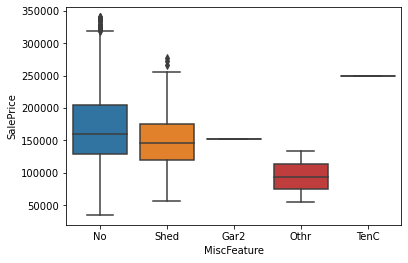

In [131]:
sns.boxplot(y = housing.SalePrice, x = housing.MiscFeature);
housing.MiscFeature.value_counts()

#### Only very few data points for TenC, Gar2 & Othr, they shall be dropped

In [132]:
DrpIdx = housing[ (housing['MiscFeature'] == 'TenC') | (housing['MiscFeature'] == "Gar2") | 
                 (housing['MiscFeature'] == 'Othr') ].index
housing.drop(DrpIdx , inplace=True)

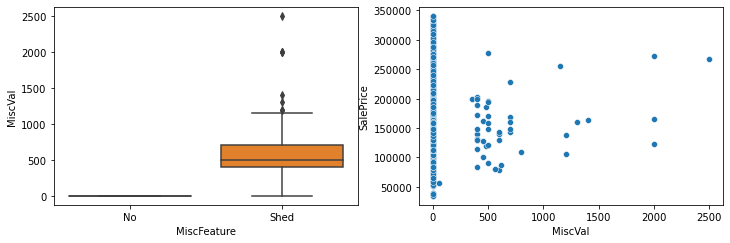

In [133]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x = housing.MiscFeature, y = housing.MiscVal);
plt.subplot(2,2,2)
sns.scatterplot(x = housing.MiscVal, y = housing.SalePrice);
plt.show()

#### MiscValue has few datapoints and can also be inferred by the MiscFeature. This shall be dropped

In [134]:
housing.drop(['MiscVal'], axis = 1, inplace = True)

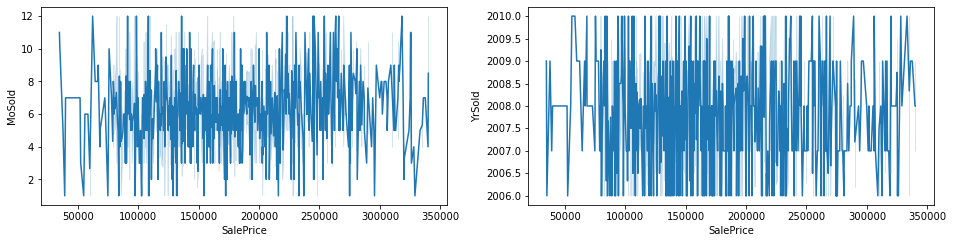

In [135]:
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.lineplot(x = housing.SalePrice, y = housing.MoSold);
plt.subplot(2,2,2)
sns.lineplot(x = housing.SalePrice, y = housing.YrSold);
plt.show()

#### Not much correlation

WD       1218
New        89
COD        42
ConLD       9
ConLw       5
ConLI       4
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1152
Abnorml      99
Partial      92
Family       20
Alloca       10
AdjLand       3
Name: SaleCondition, dtype: int64


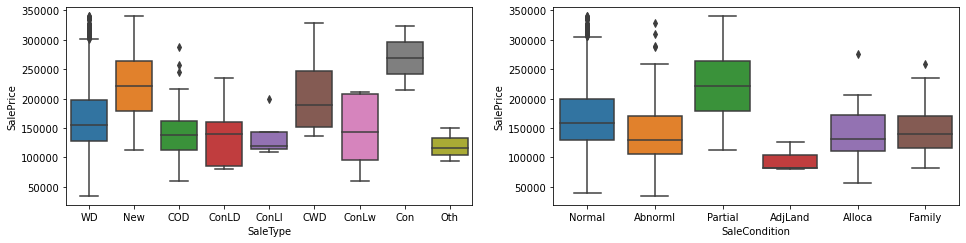

In [136]:
print(housing.SaleType.value_counts())
print(housing.SaleCondition.value_counts())
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.boxplot(y = housing.SalePrice, x = housing.SaleType);
plt.subplot(2,2,2)
sns.boxplot(y = housing.SalePrice, x = housing.SaleCondition);
plt.show()

In [137]:
housing.shape

(1376, 74)

In [138]:
housing["SaleType"] = housing.SaleType.replace({'ConLD': 'Other', 'ConLI': 'Other', 'CWD': 'Other', 
                                                'ConLw': 'Other', 'Con': 'Other', 'Oth': 'Other'})

housing["SaleCondition"] = housing.SaleCondition.replace({'AdjLand': 'Other', 'Alloca': 'Other', 'Family': 'Other'})

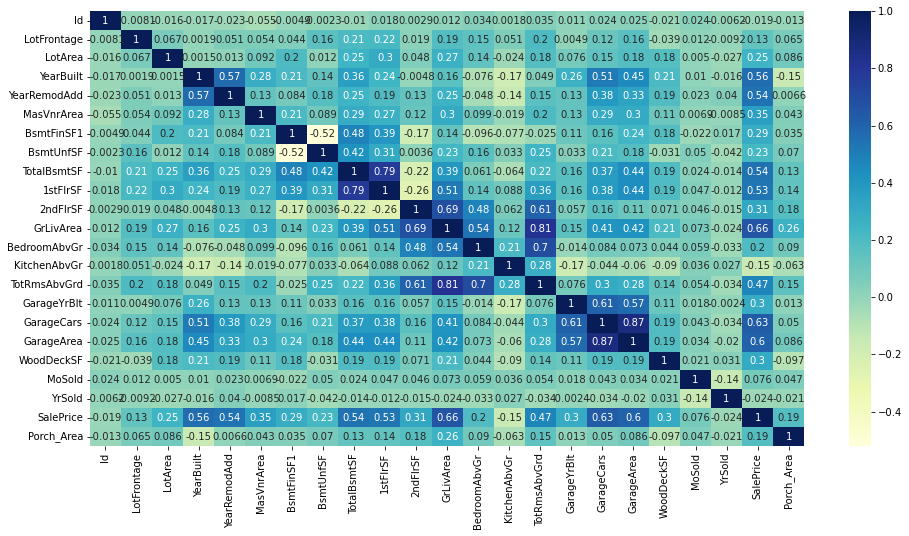

In [139]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [140]:
housing.drop(['Id'], axis = 1, inplace = True)

#### Inference: 
- Around 8 independent variables are corr with the Target variable

## Step 3: Data Preparation
- Data preparation for Model building
    - Dummy varaible creation
    - Scaling
    - Train and Test data split

In [141]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Porch,Porch_Area
0,2S,RL,65.00,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,Y,0,No,2,2008,WD,Normal,208500,Only Open,61
1,1S,RL,80.00,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,Y,298,No,5,2007,WD,Normal,181500,No,0
2,2S,RL,68.00,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,Y,0,No,9,2008,WD,Normal,223500,Only Open,42
3,2S,RL,60.00,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,Y,0,No,2,2006,WD,Abnorml,140000,Open & Enclosed,307
4,2S,RL,84.00,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,Y,192,No,12,2008,WD,Normal,250000,Only Open,84


In [142]:
num_columns = list(housing.select_dtypes(include = "number")) # List the numerical columns before dummy creation for use in Scaling
cat_columns = list(housing.select_dtypes(include="object"))

In [143]:
print ("Num Cols:", len(num_columns))
print ("Cat Cols:", len(cat_columns))
print("Shape of Housing", housing.shape)

Num Cols: 22
Cat Cols: 51
Shape of Housing (1376, 73)


### Dummy Variables

In [144]:
housing_1 = housing.copy() #Create a copy of the df

In [145]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MiscFeature,SaleType,SaleCondition,Porch
0,2S,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,No,Attchd,RFn,TA,TA,Y,No,WD,Normal,Only Open
1,1S,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Fa_TA_Gd,Attchd,RFn,TA,TA,Y,No,WD,Normal,No
2,2S,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Fa_TA_Gd,Attchd,RFn,TA,TA,Y,No,WD,Normal,Only Open
3,2S,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Fa_TA_Gd,Detchd,Unf,TA,TA,Y,No,WD,Abnorml,Open & Enclosed
4,2S,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Fa_TA_Gd,Attchd,RFn,TA,TA,Y,No,WD,Normal,Only Open


In [146]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1.5S_UF,MSSubClass_1S,MSSubClass_1S_PUD,MSSubClass_2.5S,MSSubClass_2FC,MSSubClass_2S,MSSubClass_2S_PUD,MSSubClass_Dup,MSSubClass_ML_PUD,MSSubClass_SL,...,MiscFeature_Shed,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Porch_Only Enclosed,Porch_Only Open,Porch_Open & Enclosed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [147]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)
# Add the results to the original housing dataframe
housing = pd.concat([housing, housing_dummies], axis=1)

housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscFeature_Shed,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Porch_Only Enclosed,Porch_Only Open,Porch_Open & Enclosed
0,65.00,8450,2003,2003,196.00,706,150,856,856,854,...,0,0,0,1,1,0,0,0,1,0
1,80.00,9600,1976,1976,0.00,978,284,1262,1262,0,...,0,0,0,1,1,0,0,0,0,0
2,68.00,11250,2001,2002,162.00,486,434,920,920,866,...,0,0,0,1,1,0,0,0,1,0
3,60.00,9550,1915,1970,0.00,216,540,756,961,756,...,0,0,0,1,0,0,0,0,0,1
4,84.00,14260,2000,2000,350.00,655,490,1145,1145,1053,...,0,0,0,1,1,0,0,0,1,0


#### Inference: 
- All the variables are Numeric type post the Dummy variables creation

## Splitting the Data into Training and Testing Sets

In [148]:
from sklearn.model_selection import train_test_split

# To specify that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [149]:
print(df_train.shape)
print(df_test.shape)

(963, 192)
(413, 192)


### Scaling of the data
- MinMax scaler 

In [150]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [151]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
housing[num_columns].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice,Porch_Area
count,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,...,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00,1376.00
mean,56.59,10150.49,1970.07,1984.11,90.22,416.37,561.31,1025.46,1133.05,334.75,...,1.05,6.41,1866.80,1.72,460.35,90.35,6.30,2007.82,170431.84,85.17
std,34.32,8358.46,30.03,20.64,159.79,429.17,430.54,407.24,356.75,420.03,...,0.22,1.53,455.30,0.72,204.04,122.18,2.70,1.33,59214.91,103.20
min,0.00,1300.00,1872.00,1950.00,0.00,0.00,0.00,0.00,334.00,0.00,...,1.00,2.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00,0.00
25%,40.00,7433.50,1953.00,1966.00,0.00,0.00,217.75,788.00,871.25,0.00,...,1.00,5.00,1957.00,1.00,314.25,0.00,5.00,2007.00,129000.00,0.00
50%,61.00,9308.00,1971.00,1992.00,0.00,368.00,481.50,975.00,1070.00,0.00,...,1.00,6.00,1977.00,2.00,471.00,0.00,6.00,2008.00,159467.00,48.00
75%,78.00,11316.25,1999.00,2003.00,143.25,685.00,808.00,1252.25,1350.00,720.00,...,1.00,7.00,2000.00,2.00,575.00,168.00,8.00,2009.00,203250.00,134.25
max,313.00,164660.00,2009.00,2010.00,1600.00,5644.00,2042.00,6110.00,4692.00,1818.00,...,3.00,14.00,2010.00,4.00,1418.00,736.00,12.00,2010.00,340000.00,1027.00


In [152]:
#Scaling the train data set
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
#Scaling the test data set
df_test[num_columns] = scaler.transform(df_test[num_columns])
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscFeature_Shed,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Porch_Only Enclosed,Porch_Only Open,Porch_Open & Enclosed
829,0.08,0.01,0.97,0.93,0.00,0.00,0.29,0.19,0.03,0.34,...,0,0,0,1,1,0,0,0,1,0
1146,0.00,0.06,0.82,0.59,0.05,0.78,0.02,0.40,0.35,0.00,...,0,0,0,1,1,0,0,0,1,0
1389,0.19,0.03,0.50,0.00,0.00,0.23,0.18,0.23,0.18,0.19,...,0,0,0,1,1,0,0,0,0,0
457,0.00,0.32,0.60,0.75,0.00,0.69,0.12,0.43,0.50,0.00,...,0,0,0,1,1,0,0,0,1,0
170,0.00,0.07,0.50,0.00,0.00,0.22,0.18,0.22,0.17,0.00,...,0,0,0,1,1,0,0,0,0,0


In [153]:
df_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscFeature_Shed,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Porch_Only Enclosed,Porch_Only Open,Porch_Open & Enclosed
count,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,...,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00
mean,0.18,0.05,0.71,0.57,0.05,0.25,0.28,0.32,0.28,0.18,...,0.03,0.06,0.02,0.89,0.85,0.03,0.06,0.14,0.44,0.09
std,0.11,0.05,0.22,0.35,0.10,0.25,0.21,0.12,0.14,0.23,...,0.18,0.23,0.14,0.31,0.36,0.16,0.23,0.35,0.50,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.04,0.57,0.25,0.00,0.00,0.11,0.24,0.18,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.20,0.05,0.72,0.69,0.00,0.23,0.24,0.30,0.26,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,0.25,0.06,0.92,0.90,0.08,0.42,0.41,0.39,0.37,0.39,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Dividing into X and Y sets for the model building

In [154]:
# Copy the data for Ridge & Lasso.
df_train_rl = df_train.copy() 
df_test_rl = df_test.copy()

In [155]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

## Step 4: Model Building and Evaluation

### Linear Regression


In [156]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [157]:
# Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(lm, step = 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [158]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 2),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 2),
 ('TotRmsAbvGrd', False, 2),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('MoSold', False, 3),
 ('YrSold', False, 3),
 ('Porch_Area', True, 1),
 ('MSSubClass_1.5S_UF', True, 1),
 ('MSSubClass_1S', False, 2),
 ('MSSubClass_1S_PUD', True, 1),
 ('MSSubClass_2.5S', False, 2),
 ('MSSubClass_2FC', True, 1),
 ('MSSubClass_2S', False, 3),
 ('MSSubClass_2S_PUD', False, 2),
 ('MSSubClass_Dup', True, 1),
 ('MSSubClass_ML_PUD', False, 3),
 ('MSSubClass_SL', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 

In [159]:
col = X_train.columns[rfe.support_]
print(col, len(col))

Index(['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'Porch_Area', 'MSSubClass_1.5S_UF', 'MSSubClass_1S_PUD',
       'MSSubClass_2FC', 'MSSubClass_Dup', 'MSSubClass_SL', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition2_Others', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'OverallQual_Ex', 'OverallQual_Good', 'OverallCond_Ex',
       'OverallCond_Good', 'OverallCond_Poor', 'RoofSty

In [160]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'MoSold', 'YrSold', 'MSSubClass_1S',
       'MSSubClass_2.5S', 'MSSubClass_2S', 'MSSubClass_2S_PUD',
       'MSSubClass_ML_PUD', 'Alley_No', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside',
       'LandSlope_Mod', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_Pos', 'Condition1_RR', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'Over

### Building model using statsmodel, for the detailed statistics

In [161]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [162]:
X_train_rfe.shape

(963, 95)

In [163]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [164]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [165]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:10:06   Log-Likelihood:                 1475.1
No. Observations:                 963   AIC:                            -2778.
Df Residuals:                     877   BIC:                            -2359.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

In [166]:
pvalues = lm.pvalues
print(type(pvalues))
print(pvalues[pvalues >= 0.2])

<class 'pandas.core.series.Series'>
const                0.49
MasVnrArea           0.20
GarageYrBlt          0.40
LandContour_Low      0.39
Utilities_NoSeWa     0.30
Condition2_Others    0.83
HouseStyle_1.5Unf    0.27
RoofMatl_Tar&Grv     0.93
MasVnrType_BrkFace   0.23
ExterQual_Fa         0.62
BsmtFinType2_No      0.37
GarageType_No        0.33
GarageFinish_No      0.33
GarageQual_Fa        0.32
GarageQual_Gd        0.82
GarageQual_No        0.33
GarageQual_Po        0.75
GarageQual_TA        0.29
GarageCond_Fa        0.88
GarageCond_Gd        0.99
GarageCond_No        0.33
GarageCond_TA        0.75
dtype: float64


#### Dropping columns that has very high P values

#### After recursive execution, dropping the below one by one. Just for clean code purpose, dropping is consolidated below

In [167]:
# drop variable
X_train_rfe = X_train_rfe.drop('GarageCond_Gd', axis=1)
X_train_rfe = X_train_rfe.drop('RoofMatl_Tar&Grv', axis=1)
X_train_rfe = X_train_rfe.drop('Condition2_Others', axis=1)
X_train_rfe = X_train_rfe.drop('ExterQual_Fa', axis=1)
X_train_rfe = X_train_rfe.drop('GarageQual_Gd', axis=1)
X_train_rfe = X_train_rfe.drop('GarageQual_Po', axis=1)
X_train_rfe = X_train_rfe.drop('GarageCond_Fa', axis=1)
X_train_rfe = X_train_rfe.drop('GarageCond_TA', axis=1)
X_train_rfe.shape

(963, 88)

In [168]:
# drop variable
X_train_rfe = X_train_rfe.drop('GarageType_No', axis=1)
X_train_rfe = X_train_rfe.drop('GarageFinish_No', axis=1)
X_train_rfe = X_train_rfe.drop('GarageQual_No', axis=1)
X_train_rfe = X_train_rfe.drop('GarageCond_No', axis=1)

X_train_rfe = X_train_rfe.drop('const', axis=1)
X_train_rfe.shape

(963, 83)

In [169]:
X_train_rfe = X_train_rfe.drop('GarageYrBlt', axis=1)
X_train_rfe = X_train_rfe.drop('LandContour_Low', axis=1)
X_train_rfe = X_train_rfe.drop('Utilities_NoSeWa', axis=1)
X_train_rfe = X_train_rfe.drop('HouseStyle_1.5Unf', axis=1)
X_train_rfe = X_train_rfe.drop('MasVnrType_BrkFace', axis=1)
X_train_rfe = X_train_rfe.drop('BsmtFinType2_No', axis=1)

#X_train_rfe = X_train_rfe.drop('const', axis=1)
X_train_rfe.shape

(963, 77)

In [170]:
X_train_rfe = X_train_rfe.drop('MasVnrArea', axis=1)

#X_train_rfe = X_train_rfe.drop('const', axis=1)
X_train_rfe.shape

(963, 76)

In [171]:
X_train_rfe = X_train_rfe.drop('MasVnrType_None', axis=1)

#X_train_rfe = X_train_rfe.drop('const', axis=1)
X_train_rfe.shape

(963, 75)

### Building model and RFE

In [172]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     161.6
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:10:06   Log-Likelihood:                 1469.1
No. Observations:                 963   AIC:                            -2796.
Df Residuals:                     892   BIC:                            -2450.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

### Checking VIF

In [173]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
49,Foundation_Wood,1.08
21,LotConfig_FR3,1.09
23,Neighborhood_Blueste,1.12
72,SaleType_Other,1.15
28,Neighborhood_NoRidge,1.20
...,...,...
33,BldgType_Duplex,inf
32,BldgType_2fmCon,inf
14,MSSubClass_Dup,inf
13,MSSubClass_2FC,inf


In [174]:
DrpIdx = vif[ (vif['VIF'] > 5)].index

In [175]:
print("Number of Variables that have VIF greater than 5:", len(DrpIdx))

Number of Variables that have VIF greater than 5: 34


In [176]:
#vif[ (vif['VIF'] > 100)]
#vif[ (vif['VIF'] > 50)]
vif[ (vif['VIF'] > 5)]

,Features,VIF
8,GarageArea,5.79
2,YearBuilt,5.86
15,MSSubClass_SL,5.90
7,GarageCars,6.14
38,HouseStyle_SLvl,6.32
4,TotalBsmtSF,6.61
69,GarageQual_TA,6.81
36,HouseStyle_1Story,7.34
6,GrLivArea,9.03
59,KitchenQual_Gd,9.34


#### After recursive execution, dropping the below one by one. Just for clean code purpose, dropping is consolidated below

In [177]:
X_train_rfe = X_train_rfe.drop('BsmtCond_No_Fa', axis=1)
X_train_rfe = X_train_rfe.drop('MSSubClass_2FC', axis=1)
X_train_rfe = X_train_rfe.drop('BsmtCond_TA', axis=1)
X_train_rfe = X_train_rfe.drop('MSSubClass_Dup', axis=1)
X_train_rfe = X_train_rfe.drop('BsmtCond_Gd', axis=1)
X_train_rfe = X_train_rfe.drop('Street_Pave', axis=1)
X_train_rfe = X_train_rfe.drop('MSZoning_RL', axis=1)
X_train_rfe = X_train_rfe.drop('GarageQual_TA', axis=1)
X_train_rfe = X_train_rfe.drop('YearBuilt', axis=1)
X_train_rfe = X_train_rfe.drop('GrLivArea', axis=1)
X_train_rfe = X_train_rfe.drop('Exterior1st_VinylSd', axis=1)
X_train_rfe = X_train_rfe.drop('GarageCars', axis=1)
X_train_rfe = X_train_rfe.drop('SaleCondition_Partial', axis=1)
X_train_rfe = X_train_rfe.drop('FireplaceQu_No', axis=1)
X_train_rfe = X_train_rfe.drop('TotalBsmtSF', axis=1)
X_train_rfe = X_train_rfe.drop('KitchenQual_Fa_TA', axis=1)
X_train_rfe = X_train_rfe.drop('GarageType_Attchd', axis=1)
X_train_rfe = X_train_rfe.drop('SaleCondition_Normal', axis=1)
X_train_rfe = X_train_rfe.drop('GarageArea', axis=1)
X_train_rfe = X_train_rfe.drop('HouseStyle_1Story', axis=1)
X_train_rfe = X_train_rfe.drop('MSSubClass_SL', axis=1)

X_train_rfe = X_train_rfe.drop('const', axis=1)
X_train_rfe.shape

(963, 54)

### Inference:

- 20+ variables dropped that had high P values
- 20+ varaibles dropped that had high VIF

In [178]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
47,GarageType_CarPort,1.07
36,Foundation_Wood,1.07
52,SaleType_Other,1.08
10,LotConfig_FR3,1.09
12,Neighborhood_Blueste,1.10
50,GarageCond_Po,1.13
29,OverallCond_Ex,1.14
5,MSSubClass_1.5S_UF,1.14
53,SaleCondition_Other,1.15
8,MSZoning_RH,1.15


In [179]:
#X_train_rfe = X_train_rfe.drop('const', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
X_train = X_train_rfe
X_train = sm.add_constant(X_train)

In [180]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

## Model Prediction & Evaluation

In [181]:
from sklearn.metrics import r2_score, mean_squared_error

In [182]:
# Instantiate
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [183]:
#Predict and consolidate the Metrics
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train):", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test):", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train):", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test):", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train):", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test):", mse_test_lr)
metric.append(mse_test_lr**0.5)

print("Number of Predictor varaibles: {}".format(X_train_rfe.shape[1]))
metric.append(X_train_rfe.shape[1])

R2 Score (Train): 0.8070443267745827
R2 Score (Test): 0.7031385877670123
RSS (Train): 7.039672402762792
RSS (Test): 4.544518688226715
MSE (Train): 0.007310147874104665
MSE (Test): 0.0110036772112027
Number of Predictor varaibles: 54


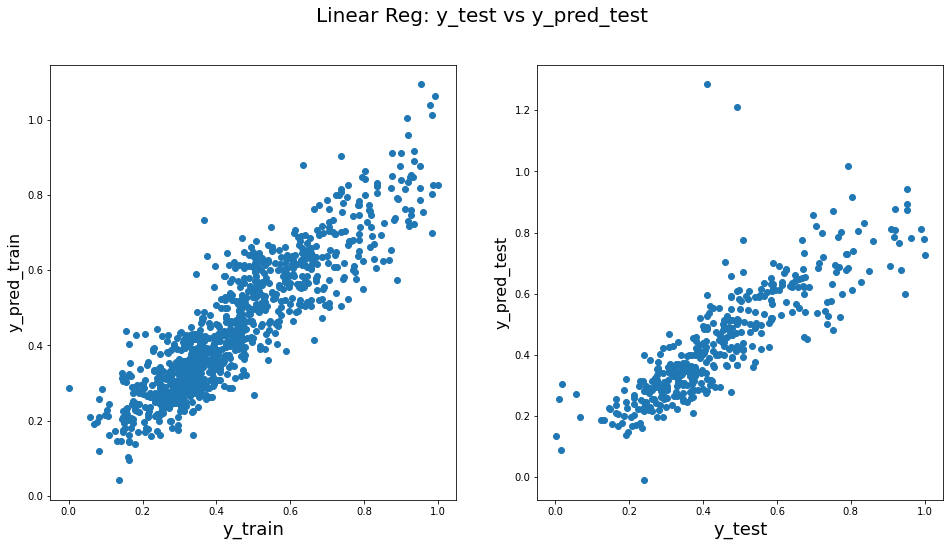

In [184]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train)
plt.suptitle('Linear Reg: y_train vs y_pred_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred_train', fontsize=16)                          # Y-label

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test)
plt.suptitle('Linear Reg: y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)                          # Y-label
plt.show()

### Q-Q Plot

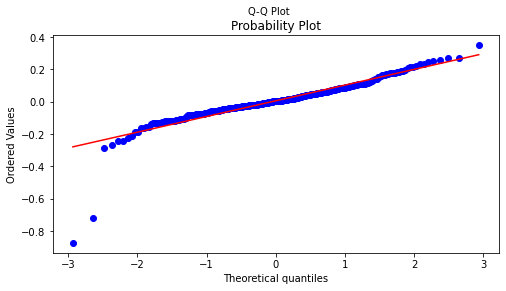

In [185]:
# Q-Q Plot on the residual
residual = y_test - y_pred_test
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle('Q-Q Plot', fontsize = 10) 
sp.stats.probplot(residual, plot=ax, fit=True);

### Residual Visualization

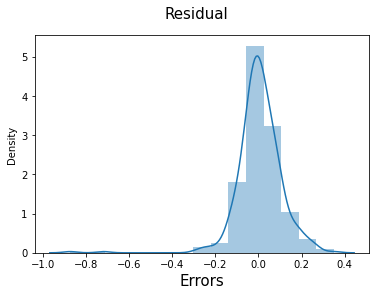

In [186]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 15)
fig.suptitle('Residual', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15);                         # X-label

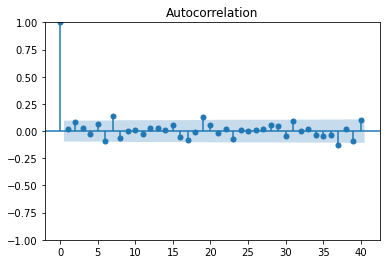

In [187]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### Insights:
- the Residue is normally distributed
- the mean is at `Zero`
- Slightly skewed
- the Residue has a constant variance without increasing or decreasing pattern

In [188]:
print(lm.intercept_)

0.39157315530053727


In [189]:
lm.coef_

array([-2.09921892e-17,  7.51936241e-01, -8.83617127e-03,  1.14510571e-01,
        6.55423717e-02,  1.13221651e-01, -3.34106174e-02,  4.87691143e-02,
       -3.47509975e-02, -1.05417413e-02, -4.50884751e-02,  1.35842251e-02,
       -2.60223415e-01,  6.60366991e-02,  1.22229149e-01, -1.42757049e-03,
        6.00389973e-02, -5.52422590e-02,  1.57630319e-01,  1.11881292e-01,
        9.21927841e-02,  9.90940500e-02, -5.31205110e-02,  2.69818590e-02,
       -1.23937565e-01, -9.17019491e-02, -3.54947079e-02, -2.87148950e-03,
        2.86341903e-01,  1.01190452e-01,  3.89791040e-02,  2.57942006e-02,
       -1.06098656e-01,  5.11738595e-02,  3.80390571e-02,  1.56342309e-02,
        3.42759795e-02, -2.13187115e-02, -8.16655823e-02, -1.72635951e-01,
       -1.49498482e-01,  7.72563451e-02, -5.47298730e-02,  3.66738555e-02,
        2.25829237e-03,  5.10582188e-02, -7.53206600e-03, -1.17315044e-02,
       -5.90403270e-02, -1.71024741e-02, -5.10667567e-02, -3.27896742e-02,
        8.62803893e-03, -

In [190]:
lm.feature_names_in_

array(['const', 'LotArea', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF',
       'Porch_Area', 'MSSubClass_1.5S_UF', 'MSSubClass_1S_PUD',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'OverallQual_Ex', 'OverallQual_Good',
       'OverallCond_Ex', 'OverallCond_Good', 'OverallCond_Poor',
       'RoofStyle_Others', 'Exterior1st_Others', 'Exterior2nd_VinylSd',
       'MasVnrType_Stone', 'Foundation_Wood', 'BsmtQual_Gd',
       'BsmtQual_No_Fa', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_No', 'KitchenQual_Gd', 'Functional_non_Typ',
       'FireplaceQu_Fa_TA_Gd', 'GarageType_Ba

## Inference from Linear Regression

- R2 Score (Train): 0.80
- R2 Score (Test): 0.70

Significant variables having `positive` influencing the housing `SalePrice`:
- `LotArea` - Lot size in square feet
- `OverallQual_Ex` - OverallQual is Excellent
- `Neighborhood_NoRidge`- Neighborhood Northridge
- `Neighborhood_BrDale` - Neighborhood Briardale
- `Neighborhood_NridgHt` - Neighborhood Northridge Heights
- `2ndFlrSF` - Second floor square feet
- `Porch_Area` - Total Porch Area in square feet
- `OverallQual_Good` - Rates the overall material and finish of the house

Significant variables having `negative` influencing the housing `SalePrice`:
- `LandSlope_Sev` - Slope of property is Severe
- `BsmtQual_No_Fa`
- `BsmtQual_TA`
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
- `BldgType_Twnhs`
- `OverallCond_Poor` - Rates the overall material and finish of the house

## Step 5: Ridge and Lasso Regression
- Will skip the above RFE and manually eliminated features for Linear Regression
- and include all the features for Ridge & Lasso

In [191]:
y_train = df_train_rl.pop('SalePrice')
X_train = df_train_rl

y_test = df_test_rl.pop('SalePrice')
X_test = df_test_rl

## Ridge Regression

In [192]:
X_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscFeature_Shed,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Porch_Only Enclosed,Porch_Only Open,Porch_Open & Enclosed
count,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,...,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00,963.00
mean,0.18,0.05,0.71,0.57,0.05,0.25,0.28,0.32,0.28,0.18,...,0.03,0.06,0.02,0.89,0.85,0.03,0.06,0.14,0.44,0.09
std,0.11,0.05,0.22,0.35,0.10,0.25,0.21,0.12,0.14,0.23,...,0.18,0.23,0.14,0.31,0.36,0.16,0.23,0.35,0.50,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.04,0.57,0.25,0.00,0.00,0.11,0.24,0.18,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.20,0.05,0.72,0.69,0.00,0.23,0.24,0.30,0.26,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,0.25,0.06,0.92,0.90,0.08,0.42,0.41,0.39,0.37,0.39,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [193]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [195]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 150 # Optimal Value
#alpha = 300 # Doubled Value
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00815081  0.00632116  0.00586135  0.02047097  0.00837166  0.02453491
  0.01636539  0.02463006  0.02993795  0.020185    0.03638624  0.01003816
 -0.00196536  0.02342645  0.0061476   0.02428068  0.02415507  0.0145827
  0.00465915 -0.00167298  0.00884286 -0.00074205  0.00377466 -0.00688838
  0.00600487 -0.00091444  0.01726897 -0.01230105 -0.00084468 -0.00360893
 -0.00503735  0.00311055 -0.00017098  0.0162276  -0.01402457  0.00135974
  0.0026229   0.00025562  0.00489039 -0.00013947 -0.01118964  0.0028122
  0.00353373 -0.00510761 -0.00065077  0.00507243 -0.00203493  0.00070715
 -0.00813587  0.00643783  0.00149351 -0.00033542 -0.00144113  0.00258518
  0.00854826 -0.01007356  0.0141959  -0.01031695 -0.01313539 -0.00404662
 -0.00655724 -0.00246967 -0.00408856 -0.00150183 -0.00063808  0.014812
  0.01951679 -0.00384638 -0.00265554 -0.00597383 -0.00534991  0.00933271
  0.00264008  0.00533708  0.00025152 -0.00394582  0.00505177  0.00625823
 -0.0028944   0.00067219 -0.00091444 -0.00084468 -0.009

In [196]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas.sort_values(by = 'Ridge', ascending=False)

,Ridge
GrLivArea,0.04
OverallQual_Good,0.03
FullBath_2_3,0.03
1stFlrSF,0.03
TotalBsmtSF,0.02
...,...
BsmtCond_TA,-0.02
BsmtExposure_No,-0.02
FireplaceQu_No,-0.02
KitchenQual_Fa_TA,-0.03


In [197]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("Ridge Metrics\n")

metric2 = []
r2_train_Rg = r2_score(y_train, y_pred_train)
print("R2 Score (Train): {:.2f}".format(r2_train_Rg))
metric2.append(r2_train_Rg)

r2_test_Rg = r2_score(y_test, y_pred_test)
print("R2 Score (Test): {:.2f}".format(r2_test_Rg))
metric2.append(r2_test_Rg)

rss1_Rg = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): {:.2f}".format(rss1_Rg))
metric2.append(rss1_Rg)

rss2_Rg = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): {:.2f}".format(rss2_Rg))
metric2.append(rss2_Rg)

mse_train_Rg = mean_squared_error(y_train, y_pred_train)
print("MSE (Train): {:.4f}".format(mse_train_Rg))
metric2.append(mse_train_Rg**0.5)

mse_test_Rg = mean_squared_error(y_test, y_pred_test)
print("MSE (Test): {:.4f}".format(mse_test_Rg))
metric2.append(mse_test_Rg**0.5)

print("Number of Predictor varaibles: {}".format(np.sum(ridge.coef_ != 0)))
metric2.append(np.sum(ridge.coef_ != 0))

Ridge Metrics

R2 Score (Train): 0.81
R2 Score (Test): 0.76
RSS (Train): 7.03
RSS (Test): 3.61
MSE (Train): 0.0073
MSE (Test): 0.0087
Number of Predictor varaibles: 191


## Lasso

In [198]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [199]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [200]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [201]:
#Fitting Lasso model and checking coefficients which have been penalised

alpha = 0.004 # Optimal Value
#alpha = 0.008 # Doubled Value

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004)

In [202]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.37503425e-02,
        0.00000000e+00,  5.10978287e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.87451620e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.50752998e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.97299397e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.62073947e-02, -4.92372490e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.75653530e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [203]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("Lasso Metrics\n")

metric3 = []
r2_train_Ls = r2_score(y_train, y_pred_train)
print("R2 Score (Train): {:.2f}".format(r2_train_Ls))
metric3.append(r2_train_Ls)

r2_test_Ls = r2_score(y_test, y_pred_test)
print("R2 Score (Test): {:.2f}".format(r2_test_Ls))
metric3.append(r2_test_Ls)

rss1_Ls = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): {:.2f}".format(rss1_Ls))
metric3.append(rss1_Ls)

rss2_Ls = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): {:.2f}".format(rss2_Ls))
metric3.append(rss2_Ls)

mse_train_Ls = mean_squared_error(y_train, y_pred_train)
print("MSE (Train): {:.4f}".format(mse_train_Ls))
metric3.append(mse_train_Ls**0.5)

mse_test_Ls = mean_squared_error(y_test, y_pred_test)
print("MSE (Test): {:.4f}".format(mse_test_Ls))
metric3.append(mse_test_Ls**0.5)
print("Number of Predictor varaibles: {}".format(np.sum(lasso.coef_ != 0)))
metric3.append(np.sum(lasso.coef_ != 0))

Lasso Metrics

R2 Score (Train): 0.80
R2 Score (Test): 0.73
RSS (Train): 7.38
RSS (Test): 4.19
MSE (Train): 0.0077
MSE (Test): 0.0101
Number of Predictor varaibles: 27


In [204]:
# Creating a table which contain all the metrics

lr_table = {'METRIC': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'No. of Predictors'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['METRIC', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,METRIC,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.81,0.81,0.80
1,R2 Score (Test),0.70,0.76,0.73
2,RSS (Train),7.04,7.03,7.38
3,RSS (Test),4.54,3.61,4.19
4,MSE (Train),0.09,0.09,0.09
5,MSE (Test),0.10,0.09,0.10
6,No. of Predictors,54.00,191.00,27.00


### Coefficients after regularization

In [205]:
betas = pd.DataFrame(index=df_train.columns)

In [206]:
betas.rows = df_train.columns

In [207]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

### Ridge: Top 10 variables that influence the `SalePrice` based on their co-ef

In [208]:
betas['Ridge'].sort_values(ascending=False).head(10)

GrLivArea          0.04
OverallQual_Good   0.03
FullBath_2_3       0.03
1stFlrSF           0.03
TotalBsmtSF        0.02
BsmtFinSF1         0.02
GarageCars         0.02
GarageArea         0.02
OverallQual_Ex     0.02
TotRmsAbvGrd       0.02
Name: Ridge, dtype: float64

### Lasso: Top 10 variables that influence the `SalePrice`  based on their co-ef

In [209]:
betas['Lasso'].sort_values(ascending=False).head(10)

GrLivArea          0.29
GarageCars         0.08
BsmtFinSF1         0.05
OverallQual_Good   0.05
YearRemodAdd       0.03
MSZoning_RL        0.03
OverallQual_Ex     0.02
FullBath_2_3       0.02
Foundation_PConc   0.02
BsmtFinType1_GLQ   0.02
Name: Lasso, dtype: float64

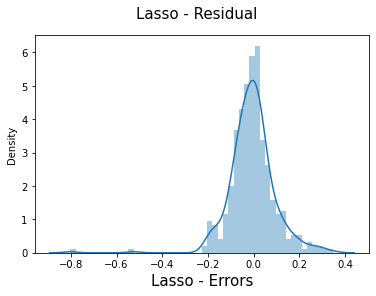

In [210]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 50)
fig.suptitle('Lasso - Residual', fontsize = 15)                  # Plot heading 
plt.xlabel('Lasso - Errors', fontsize = 15);                         # X-label

### Q-Q Plot

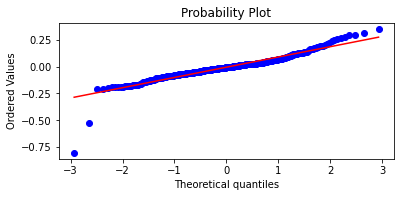

In [211]:
# Q-Q Plot on the residual
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot((y_test - y_pred_test), plot=ax, fit=True)

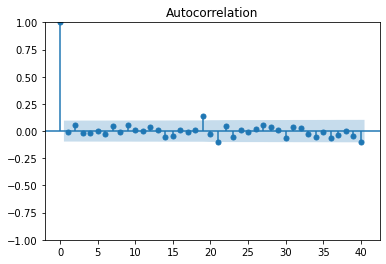

In [212]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf((y_test - y_pred_test), lags=40 , alpha=0.05)
acf.show()

### Insights:
- the Residue is normally distributed
- the mean is at `Zero`
- Slightly skewed
- the Residue has a constant variance without increasing or decreasing pattern

# Inference & Conclusion

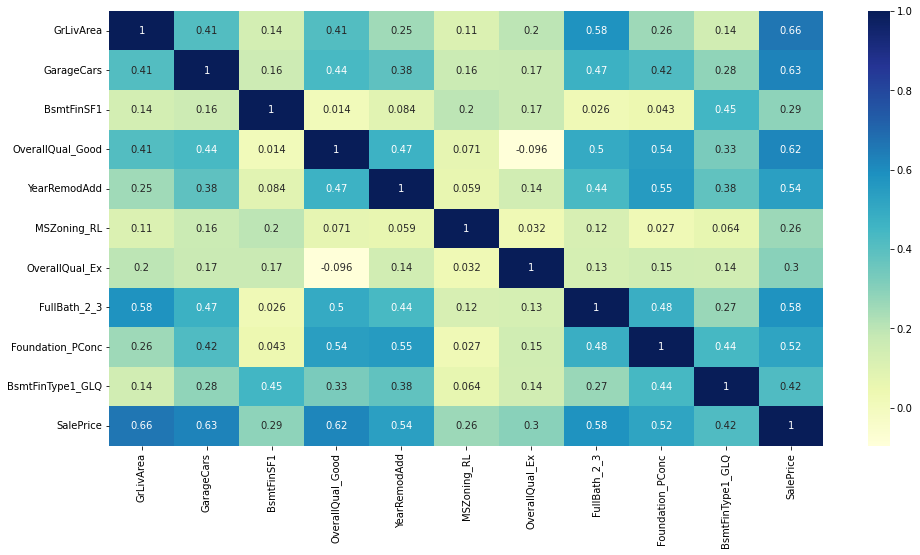

In [213]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))
top_10 = ['GrLivArea', 'GarageCars', 'BsmtFinSF1', 'OverallQual_Good', 'YearRemodAdd', 
          'MSZoning_RL', 'OverallQual_Ex', 'FullBath_2_3', 'Foundation_PConc', 'BsmtFinType1_GLQ', 'SalePrice']
# heatmap
sns.heatmap(housing[top_10].corr(), cmap="YlGnBu", annot=True)
plt.show()

The below are the top 5 perdictor variables affecting the `SalePrice`
- `GrLivArea`: Above grade (ground) living area square feet
- `GarageCars` Size of garage in car capacity
- `BsmtFinSF1` Type 1 basement finished square feet
- `OverallQual_Good` The overall material and finish of the house is `Good`
- `YearRemodAdd` Remodel date or the construction date

## Reference for the Subjective Questions

### Lasso after dropping the top 5 predictor variables
- GrLivArea
- GarageCars
- BsmtFinSF1
- OverallQual_Good
- YearRemodAdd 

In [214]:
#['GrLivArea', 'GarageCars', 'BsmtFinSF1', 'OverallQual_Good', 'YearRemodAdd']

In [215]:
X_train.drop(['GrLivArea'], axis = 1, inplace = True)
X_train.drop(['GarageCars'], axis = 1, inplace = True)
X_train.drop(['BsmtFinSF1'], axis = 1, inplace = True)
X_train.drop(['OverallQual_Good'], axis = 1, inplace = True)
X_train.drop(['YearRemodAdd'], axis = 1, inplace = True)

In [216]:
X_test.drop(['GrLivArea'], axis = 1, inplace = True)
X_test.drop(['GarageCars'], axis = 1, inplace = True)
X_test.drop(['BsmtFinSF1'], axis = 1, inplace = True)
X_test.drop(['OverallQual_Good'], axis = 1, inplace = True)
X_test.drop(['YearRemodAdd'], axis = 1, inplace = True)

In [217]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
lasso = Lasso()

folds = 10
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [218]:
print(model_cv.best_params_)
cv_results = pd.DataFrame(model_cv.cv_results_)
#Fitting Lasso model and checking coefficients which have been penalised

alpha = 0.002
#alpha = 0.008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

{'alpha': 0.0001}


Lasso(alpha=0.002)

In [219]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.49278959e-01,  3.01027002e-01,  1.34272313e-01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.30934665e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.07122583e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  4.21399380e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.62354758e-02, -9.94538860e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.79168546e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.42086680e-02, -

In [220]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("Lasso Metrics\n")

metric3 = []
r2_train_Ls = r2_score(y_train, y_pred_train)
print("R2 Score (Train): {:.2f}".format(r2_train_Ls))
metric3.append(r2_train_Ls)

r2_test_Ls = r2_score(y_test, y_pred_test)
print("R2 Score (Test): {:.2f}".format(r2_test_Ls))
metric3.append(r2_test_Ls)

rss1_Ls = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): {:.2f}".format(rss1_Ls))
metric3.append(rss1_Ls)

rss2_Ls = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): {:.2f}".format(rss2_Ls))
metric3.append(rss2_Ls)

mse_train_Ls = mean_squared_error(y_train, y_pred_train)
print("MSE (Train): {:.4f}".format(mse_train_Ls))
metric3.append(mse_train_Ls**0.5)

mse_test_Ls = mean_squared_error(y_test, y_pred_test)
print("MSE (Test): {:.4f}".format(mse_test_Ls))
metric3.append(mse_test_Ls**0.5)
print("Number of Predictor varaibles: {}".format(np.sum(lasso.coef_ != 0)))
metric3.append(np.sum(lasso.coef_ != 0))

Lasso Metrics

R2 Score (Train): 0.85
R2 Score (Test): 0.70
RSS (Train): 5.63
RSS (Test): 4.60
MSE (Train): 0.0058
MSE (Test): 0.0111
Number of Predictor varaibles: 39


In [221]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_

betas['Lasso'].sort_values(ascending=False).head(5)

1stFlrSF         0.30
TotalBsmtSF      0.15
2ndFlrSF         0.13
GarageArea       0.13
OverallQual_Ex   0.07
Name: Lasso, dtype: float64